## **BIKE SALES ANALYSIS AND PRICE PREDICTIVE MODEL DEVELOPMENT**

### Introduction
This dataset captures bike sales for a company during the year 2021. It provides a comprehensive overview of sales performance across different months, encompassing various dimensions such as customer demographics, product categories, and financial metrics. By analyzing this data, we can gain valuable insights  into how factors like seasonality, consumer preferences, and regional trends influenced demand within the company's operations.

### Problem statement 
The company seeks to optimize its bike sales strategy by identifying key factors influencing demand during 2021, such as seasonality, customer preferences, regional variations, and pricing. It is crucial to build a bike price predictive model to better understand how factors like demand fluctuations, product types, and regional trends influence pricing decisions. By forecasting optimal pricing strategies and inventory needs, the company aims to enhance profitability, improve marketing effectiveness, and ensure that pricing aligns with market conditions and consumer behavior. 


### Aims and Objectives

- Seasonality Analysis: Identify seasonal patterns in revenue and profit.

- Product Segmentation: Evaluate the performance of different bikes based on model num, sub category, size and colour

- Regional Performance: Analyze geographic distribution of sales.

- Customer Demographic and Preferences: Investigate how customer preferences influenced purchasing decisions

- Predictive Modeling for Future Planning: Develop medel to forecast  prices based on 2021 data

## **DATA LOADING**

In [6]:
#load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [7]:
#load dataset

bike = pd.read_csv('Bike_Sales_Data.csv')
bike

Sales_Order #        Date   Day     Month  Year  Customer_Age  \
0           261695  01/12/2021   1.0  December  2021            39   
1           261696  02/01/2021   2.0   January  2021            39   
2           261697   03/02/021   3.0  February  2021            39   
3           261698  04/03/2021   4.0     March  2021            39   
4           261699  05/04/2021   5.0     April  2021            39   
..             ...         ...   ...       ...   ...           ...   
209         261729  11/12/2021  11.0  December  2021            38   
210         261730  12/12/2021  12.0  December  2021            36   
211         261731  12/12/2021  12.0  December  2021            37   
212         261732  12/12/2021  12.0  December  2021            34   
213         261733  12/12/2021  12.0  December  2021            35   

                Age_Group Customer_Gender        Country            State  \
0          Adults (35-64)               F  United States       California   
1          Adults (35-64)               F  United States       California   
2          Adults (35-64)               F  United States       California   
3          Adults (35-64)               F  United States       California   
4          Adults (35-64)               F  United States       California   
..                    ...             ...            ...              ...   
209        Adults (35-64)               F  United States       California   
210        Adults (35-64)               F      Australia  New South Wales   
211        Adults (35-64)               M  United States       California   
212  Young Adults (25-34)               M      Australia  New South Wales   
213        Adults (35-64)               F      Australia         Victoria   

    Product_Category    Sub_Category        Product_Description  \
0              Bikes  Mountain Bikes     Mountain-200 Black, 46   
1              Bikes  Mountain Bikes     Mountain-200 Black, 47   
2              Bikes  Mountain Bikes     Mountain-200 Black, 48   
3              Bikes  Mountain Bikes     Mountain-200 Black, 49   
4              Bikes  Mountain Bikes     Mountain-200 Black, 50   
..               ...             ...                        ...   
209            Bikes  Mountain Bikes    Mountain-200 Silver, 38   
210            Bikes  Mountain Bikes    Mountain-200 Silver, 42   
211            Bikes  Mountain Bikes  Mountain-400-W Silver, 46   
212            Bikes  Mountain Bikes     Mountain-200 Black, 38   
213            Bikes  Mountain Bikes    Mountain-200 Silver, 42   

     Order_Quantity   Unit_Cost  Unit_Price      Profit        Cost  \
0               4.0  $1,252.00   $2,295.00   $4,172.00   $5,008.00    
1               4.0  $1,252.00   $2,295.00   $4,172.00   $5,008.00    
2               4.0  $1,252.00   $2,295.00   $4,172.00   $5,008.00    
3               4.0  $1,252.00   $2,295.00   $4,172.00   $5,008.00    
4               4.0  $1,252.00   $2,295.00   $4,172.00   $5,008.00    
..              ...         ...         ...         ...         ...   
209             1.0  $1,266.00   $2,320.00   $1,054.00   $1,266.00    
210             4.0  $1,266.00   $2,320.00   $4,216.00   $5,064.00    
211             4.0    $420.00     $769.00   $1,396.00   $1,680.00    
212             2.0  $1,252.00   $2,295.00   $2,086.00   $2,504.00    
213             1.0  $1,266.00   $2,320.00   $1,054.00   $1,266.00    

        Revenue  
0    $9,180.00   
1    $9,180.00   
2    $9,180.00   
3    $9,180.00   
4    $9,180.00   
..          ...  
209  $2,320.00   
210  $9,280.00   
211  $3,076.00   
212  $4,590.00   
213  $2,320.00   

[214 rows x 19 columns]

In [8]:
# Make a copy of the original dataset

df = bike.copy()

In [9]:
#Checking for the rows and columns of the dataset 

df.shape

(214, 19)

In [10]:
#Checking for the column titles

df.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [11]:
# Brief info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_Order #        214 non-null    int64  
 1   Date                 214 non-null    object 
 2   Day                  212 non-null    float64
 3   Month                214 non-null    object 
 4   Year                 214 non-null    int64  
 5   Customer_Age         214 non-null    int64  
 6   Age_Group            212 non-null    object 
 7   Customer_Gender      214 non-null    object 
 8   Country              214 non-null    object 
 9   State                214 non-null    object 
 10  Product_Category     214 non-null    object 
 11  Sub_Category         214 non-null    object 
 12  Product_Description  212 non-null    object 
 13  Order_Quantity       212 non-null    float64
 14  Unit_Cost            214 non-null    object 
 15  Unit_Price           214 non-null    obj

In [12]:
#Summary statistics on dataset

df.describe()

Sales_Order #         Day    Year  Customer_Age  Order_Quantity
count     214.000000  212.000000   214.0    214.000000      212.000000
mean   261768.070093   14.094340  2021.0     36.271028        2.202830
std        52.521131    7.931016     0.0      8.085308        1.196912
min    261695.000000    1.000000  2021.0     17.000000        1.000000
25%    261720.250000    8.000000  2021.0     31.000000        1.000000
50%    261760.500000   12.000000  2021.0     37.000000        2.000000
75%    261813.750000   20.000000  2021.0     40.000000        3.000000
max    261867.000000   31.000000  2021.0     63.000000        4.000000

This analysis examines a dataset consisting of 214 observations, providing insights into its distribution, central tendency, and variability.

Key Findings
- Central Tendency: The mean value is 261,768.07, with a median of 261,760.50, indicating a slightly skewed distribution.
- Variability: The standard deviation is 52.52, and the range spans from 261,695 to 261,867, demonstrating relatively low variability.
- Distribution: The 25th percentile is 261,720.25, the 50th percentile (median) is 261,760.50, and the 75th percentile is 261,813.75.
  
Implications
- The dataset's low variability suggests consistent data.
- Column 3's constant value may indicate a control or baseline measure.
- Correlations between columns could provide further insights.

## **DATA CLEANING**

#### Identifying and Handling null/missing entries

In [16]:
#Checking for number of null values in columns

df.isnull().sum()

Sales_Order #          0
Date                   0
Day                    2
Month                  0
Year                   0
Customer_Age           0
Age_Group              2
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    2
Order_Quantity         2
Unit_Cost              0
Unit_Price             0
Profit                 0
Cost                   0
Revenue                0
dtype: int64

In [17]:
#Identifying records with null values in Day Column

df[df["Day"].isnull()]

Sales_Order #        Date  Day     Month  Year  Customer_Age  \
10          261704  05/12/2021  NaN  December  2021            42   
184         261704  05/12/2021  NaN  December  2021            42   

          Age_Group Customer_Gender  Country                State  \
10   Adults (35-64)               M  Germany  Nordrhein-Westfalen   
184  Adults (35-64)               M  Germany  Nordrhein-Westfalen   

    Product_Category    Sub_Category     Product_Description  Order_Quantity  \
10             Bikes  Mountain Bikes  Mountain-200 Black, 38             4.0   
184            Bikes  Mountain Bikes  Mountain-200 Black, 38             4.0   

      Unit_Cost  Unit_Price      Profit        Cost     Revenue  
10   $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00   
184  $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00

In [18]:
#Replacing the null values in rows

df['Day'] = df['Day'].fillna(5)

In [19]:
#Verify null values in Day column has been filled

df[df["Day"].isnull()]

Empty DataFrame
Columns: [Sales_Order #, Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product_Description, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue]
Index: []

In [20]:
#Checking for the null rows in Age_Group column

df[df["Age_Group"].isnull()]

Sales_Order #        Date  Day Month  Year  Customer_Age Age_Group  \
6           261701  07/06/2021  7.0  June  2021            39       NaN   
180         261701  07/06/2021  7.0  June  2021            39       NaN   

    Customer_Gender        Country       State Product_Category  \
6                 F  United States  California            Bikes   
180               F  United States  California            Bikes   

       Sub_Category     Product_Description  Order_Quantity   Unit_Cost  \
6    Mountain Bikes  Mountain-200 Black, 52             4.0  $1,252.00    
180  Mountain Bikes  Mountain-200 Black, 52             4.0  $1,252.00    

     Unit_Price      Profit        Cost     Revenue  
6    $2,295.00   $4,172.00   $5,008.00   $9,180.00   
180  $2,295.00   $4,172.00   $5,008.00   $9,180.00

In [21]:
#Filling missing enteries in Age_Group column

df['Age_Group'] = df['Age_Group'].fillna('[Adults (35-64)]')

In [22]:
#Verify if null values in Age_Group column has been filled

df[df["Age_Group"].isnull()]

Empty DataFrame
Columns: [Sales_Order #, Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product_Description, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue]
Index: []

In [23]:
#Checking for the null rows in Product_Description column

df[df["Product_Description"].isnull()]

Sales_Order #        Date  Day     Month  Year  Customer_Age  \
21          261715  08/12/2021  8.0  December  2021            39   
195         261715  08/12/2021  8.0  December  2021            39   

          Age_Group Customer_Gender        Country   State Product_Category  \
21   Adults (35-64)               F  United States  Oregon            Bikes   
195  Adults (35-64)               F  United States  Oregon            Bikes   

       Sub_Category Product_Description  Order_Quantity   Unit_Cost  \
21   Mountain Bikes                 NaN             2.0  $1,252.00    
195  Mountain Bikes                 NaN             2.0  $1,252.00    

     Unit_Price      Profit        Cost     Revenue  
21   $2,295.00   $2,086.00   $2,504.00   $4,590.00   
195  $2,295.00   $2,086.00   $2,504.00   $4,590.00

In [24]:
#Replacing the missing entry in the Product_Description column using Mode Imputation

df['Product_Description']=df['Product_Description'].fillna('[Mountain-200 Silver, 38]')

In [25]:
#Verify if null values in the Product_Description column has been replaced with mode 

df[df["Product_Description"].isnull()]

Empty DataFrame
Columns: [Sales_Order #, Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product_Description, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue]
Index: []

In [26]:
#Checking for the most occuring product description

df["Product_Description"].value_counts().to_frame()

count
Product_Description           
Mountain-200 Silver, 38     18
Mountain-200 Black, 46      17
Mountain-200 Black, 38      17
Mountain-200 Silver, 42     13
Mountain-200 Black, 42      12
...                        ...
Road-500 Blue, 58            1
Road-200 Red, 50             1
Mountain-100 Black, 48       1
Mountain-500 Black, 52       1
Mountain-200 Red, 44         1

[73 rows x 1 columns]

In [27]:
#Verify null enteries in Order_Quantity  column has been filled

df[df["Order_Quantity"].isnull()]

Sales_Order #        Date  Day     Month  Year  Customer_Age  \
22          261716  08/12/2021  8.0  December  2021            35   
196         261716  08/12/2021  8.0  December  2021            35   

          Age_Group Customer_Gender        Country       State  \
22   Adults (35-64)               F  United States  California   
196  Adults (35-64)               F  United States  California   

    Product_Category    Sub_Category     Product_Description  Order_Quantity  \
22             Bikes  Mountain Bikes  Mountain-500 Black, 42             NaN   
196            Bikes  Mountain Bikes  Mountain-500 Black, 42             NaN   

    Unit_Cost Unit_Price    Profit    Cost Revenue  
22   $295.00    $540.00   $245.00   $0.00   $0.00   
196  $295.00    $540.00   $245.00   $0.00   $0.00

In [28]:
#Dropping the null entry since there was no purchase for that particular row

df.drop(index=22, inplace=True)
df.drop(index=196, inplace=True)

In [29]:
#Verify record with null value has been dropped

df[df["Order_Quantity"].isnull()]

Empty DataFrame
Columns: [Sales_Order #, Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product_Description, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue]
Index: []

During data exploration, four columns were identified with missing values
- Day (2 missing values)
- Age Group (2 missing values)
- Product Description (2 missing values)
- Order Quantity (2 missing values)

The following strategies were employed to handle missing values
Day Column:
- Utilized the existing Date column to extract the day and filled the missing values.
Age Group Column
- Analyzed the Age column to determine the corresponding age group and replaced missing values.
Product Description Column
- Employed mode imputation to fill missing values with the most frequent product description.
Order Quantity Column
- Removed entries with missing values, as they indicated no purchase (empty profit and cost columns) and removing them would not significant impact overall analysis.

These strategies ensured data integrity and minimized potential biases as the dataset now contains no missing values, enabling reliable analysis.

#### Identifying and Removed duplicated entries 

In [32]:
#Checking for the number of duplicate entries 

df.duplicated().sum()

38

In [33]:
#Dropping duplicate

df_new=df.drop_duplicates(inplace=True)

In [34]:
#Verify duplicates afer dropping

df.duplicated().sum()

0

In [35]:
#Checking for the dimension of datset after dropping duplicates

df.shape

(174, 19)

38 duplicates were identified and removed to ensure that each entry is unique. This cleanlinessin the data supports accurate analysis and reliable results. 

#### Identifying and splitting the appopriate columns

In [38]:
#Spliting the Age_Group into Age_Group and Age_Range

df[['Age_Grp', 'Age_Range']] =df['Age_Group'].str.split('(', expand=True)

In [39]:
df.head()

Sales_Order #        Date  Day     Month  Year  Customer_Age  \
0         261695  01/12/2021  1.0  December  2021            39   
1         261696  02/01/2021  2.0   January  2021            39   
2         261697   03/02/021  3.0  February  2021            39   
3         261698  04/03/2021  4.0     March  2021            39   
4         261699  05/04/2021  5.0     April  2021            39   

        Age_Group Customer_Gender        Country       State  ...  \
0  Adults (35-64)               F  United States  California  ...   
1  Adults (35-64)               F  United States  California  ...   
2  Adults (35-64)               F  United States  California  ...   
3  Adults (35-64)               F  United States  California  ...   
4  Adults (35-64)               F  United States  California  ...   

     Sub_Category     Product_Description Order_Quantity   Unit_Cost  \
0  Mountain Bikes  Mountain-200 Black, 46            4.0  $1,252.00    
1  Mountain Bikes  Mountain-200 Black, 47            4.0  $1,252.00    
2  Mountain Bikes  Mountain-200 Black, 48            4.0  $1,252.00    
3  Mountain Bikes  Mountain-200 Black, 49            4.0  $1,252.00    
4  Mountain Bikes  Mountain-200 Black, 50            4.0  $1,252.00    

   Unit_Price      Profit        Cost     Revenue  Age_Grp Age_Range  
0  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults     35-64)  
1  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults     35-64)  
2  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults     35-64)  
3  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults     35-64)  
4  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults     35-64)  

[5 rows x 21 columns]

In [40]:
#To remove ")" from values in a column:

df['Age_Range'] = df['Age_Range'].str.replace(')', '')

In [41]:
df.head()

Sales_Order #        Date  Day     Month  Year  Customer_Age  \
0         261695  01/12/2021  1.0  December  2021            39   
1         261696  02/01/2021  2.0   January  2021            39   
2         261697   03/02/021  3.0  February  2021            39   
3         261698  04/03/2021  4.0     March  2021            39   
4         261699  05/04/2021  5.0     April  2021            39   

        Age_Group Customer_Gender        Country       State  ...  \
0  Adults (35-64)               F  United States  California  ...   
1  Adults (35-64)               F  United States  California  ...   
2  Adults (35-64)               F  United States  California  ...   
3  Adults (35-64)               F  United States  California  ...   
4  Adults (35-64)               F  United States  California  ...   

     Sub_Category     Product_Description Order_Quantity   Unit_Cost  \
0  Mountain Bikes  Mountain-200 Black, 46            4.0  $1,252.00    
1  Mountain Bikes  Mountain-200 Black, 47            4.0  $1,252.00    
2  Mountain Bikes  Mountain-200 Black, 48            4.0  $1,252.00    
3  Mountain Bikes  Mountain-200 Black, 49            4.0  $1,252.00    
4  Mountain Bikes  Mountain-200 Black, 50            4.0  $1,252.00    

   Unit_Price      Profit        Cost     Revenue  Age_Grp Age_Range  
0  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults      35-64  
1  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults      35-64  
2  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults      35-64  
3  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults      35-64  
4  $2,295.00   $4,172.00   $5,008.00   $9,180.00   Adults      35-64  

[5 rows x 21 columns]

In [42]:
#Spliting the Product_Discription Model#, Color and Size

df[["Model_num","Color","Size"]] = df["Product_Description"].str.split(expand=True)

df

Sales_Order #        Date  Day     Month  Year  Customer_Age  \
0           261695  01/12/2021  1.0  December  2021            39   
1           261696  02/01/2021  2.0   January  2021            39   
2           261697   03/02/021  3.0  February  2021            39   
3           261698  04/03/2021  4.0     March  2021            39   
4           261699  05/04/2021  5.0     April  2021            39   
..             ...         ...  ...       ...   ...           ...   
170         261864  01/12/2021  1.0  December  2021            44   
171         261865  02/12/2021  2.0  December  2021            37   
172         261866  02/12/2021  2.0  December  2021            31   
173         261867  03/12/2021  3.0  December  2021            37   
176         261697  03/02/2021  3.0  February  2021            39   

                Age_Group Customer_Gender         Country            State  \
0          Adults (35-64)               F   United States       California   
1          Adults (35-64)               F   United States       California   
2          Adults (35-64)               F   United States       California   
3          Adults (35-64)               F   United States       California   
4          Adults (35-64)               F   United States       California   
..                    ...             ...             ...              ...   
170        Adults (35-64)               M  United Kingdom          England   
171        Adults (35-64)               M   United States       California   
172  Young Adults (25-34)               F       Australia  New South Wales   
173        Adults (35-64)               F   United States       California   
176        Adults (35-64)               F   United States       California   

     ...   Unit_Cost  Unit_Price      Profit        Cost     Revenue  \
0    ...  $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
1    ...  $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
2    ...  $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
3    ...  $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
4    ...  $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
..   ...         ...         ...         ...         ...         ...   
170  ...        1266        2320        1054        1266        2320   
171  ...         420         769         698         840        1538   
172  ...         420         769         349         420         769   
173  ...           0        2295        2086           0        4590   
176  ...  $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    

           Age_Grp Age_Range       Model_num    Color Size  
0          Adults      35-64    Mountain-200   Black,   46  
1          Adults      35-64    Mountain-200   Black,   47  
2          Adults      35-64    Mountain-200   Black,   48  
3          Adults      35-64    Mountain-200   Black,   49  
4          Adults      35-64    Mountain-200   Black,   50  
..             ...       ...             ...      ...  ...  
170        Adults      35-64    Mountain-200  Silver,   42  
171        Adults      35-64  Mountain-400-W  Silver,   46  
172  Young Adults      25-34  Mountain-400-W  Silver,   42  
173        Adults      35-64    Mountain-200   Black,   46  
176        Adults      35-64    Mountain-200   Black,   48  

[174 rows x 24 columns]

Age_Group Column Refining
The Age_Group column contained age ranges with corresponding categories (e.g., "Adults (35-64)").
To enhance analysis, the column was split into two separate columns:
- Age Group: containing categories (Adults, Young Adults, Youth)
- Age Range: containing numerical ranges (e.g. 35-64)

Product Description Column Refining
The Product Description column contained detailed product information (e.g., "Model 200, Blue, 42"). 
To facilitate analysis, the column was split into three separate columns:
- Model: containing product model types
- Colour: containing product colours
- Size: containing product sizes

The refined columns enable more precise analysis and easier data manipulation.

#### Identifying and Dropping Unwanted Columns

In [45]:
#Dropping Date and Age_Range columns:

df.drop(['Date', 'Age_Group','Product_Description','Product_Category','Year'], axis=1, inplace=True)

In [46]:
df

Sales_Order #  Day     Month  Customer_Age Customer_Gender  \
0           261695  1.0  December            39               F   
1           261696  2.0   January            39               F   
2           261697  3.0  February            39               F   
3           261698  4.0     March            39               F   
4           261699  5.0     April            39               F   
..             ...  ...       ...           ...             ...   
170         261864  1.0  December            44               M   
171         261865  2.0  December            37               M   
172         261866  2.0  December            31               F   
173         261867  3.0  December            37               F   
176         261697  3.0  February            39               F   

            Country            State    Sub_Category  Order_Quantity  \
0     United States       California  Mountain Bikes             4.0   
1     United States       California  Mountain Bikes             4.0   
2     United States       California  Mountain Bikes             4.0   
3     United States       California  Mountain Bikes             4.0   
4     United States       California  Mountain Bikes             4.0   
..              ...              ...             ...             ...   
170  United Kingdom          England  Mountain Bikes             1.0   
171   United States       California  Mountain Bikes             2.0   
172       Australia  New South Wales  Mountain Bikes             1.0   
173   United States       California  Mountain Bikes             2.0   
176   United States       California  Mountain Bikes             4.0   

      Unit_Cost  Unit_Price      Profit        Cost     Revenue  \
0    $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
1    $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
2    $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
3    $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
4    $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    
..          ...         ...         ...         ...         ...   
170        1266        2320        1054        1266        2320   
171         420         769         698         840        1538   
172         420         769         349         420         769   
173           0        2295        2086           0        4590   
176  $1,252.00   $2,295.00   $4,172.00   $5,008.00   $9,180.00    

           Age_Grp Age_Range       Model_num    Color Size  
0          Adults      35-64    Mountain-200   Black,   46  
1          Adults      35-64    Mountain-200   Black,   47  
2          Adults      35-64    Mountain-200   Black,   48  
3          Adults      35-64    Mountain-200   Black,   49  
4          Adults      35-64    Mountain-200   Black,   50  
..             ...       ...             ...      ...  ...  
170        Adults      35-64    Mountain-200  Silver,   42  
171        Adults      35-64  Mountain-400-W  Silver,   46  
172  Young Adults      25-34  Mountain-400-W  Silver,   42  
173        Adults      35-64    Mountain-200   Black,   46  
176        Adults      35-64    Mountain-200   Black,   48  

[174 rows x 19 columns]

After refining the columns, several columns were identified as redundant or unnecessary and were dropped to enhance data efficiency.

Dropped Columns:
- Date: Dropped because the analysis focused on general trends, making specific dates irrelevant.
- Age Group: Dropped after splitting into Age and Age Range, rendering the original column redundant.
- Product Description: Dropped since it was split into Model Type, Colour, and Size, providing more granular information.
- Product Category: Dropped as all entries belonged to the same category ("Mountain Bikes").
- Year: Dropped since all entries shared the same year ("2021").

The refined dataset now contains only relevant and unique columns, facilitating more accurate and efficient analysis.

#### Identifying and Converting Columns to the appopriate dataypes

In [49]:
#Checking for the datatypes of columns

df.dtypes

Sales_Order #        int64
Day                float64
Month               object
Customer_Age         int64
Customer_Gender     object
Country             object
State               object
Sub_Category        object
Order_Quantity     float64
Unit_Cost           object
Unit_Price          object
Profit              object
Cost                object
Revenue             object
Age_Grp             object
Age_Range           object
Model_num           object
Color               object
Size                object
dtype: object

In [50]:
#Converting Gender,Day and Order_Quantity column into appopriate data type

df['Customer_Gender']= df['Customer_Gender'].astype('category')
df['Day']=df['Day'].astype('int')
df['Order_Quantity']=df['Order_Quantity'].astype('int')

In [51]:
#Remove "," and "]" from values in Color and Size column respectively

df['Color'] = df['Color'].str.replace(',', '')
df['Size'] = df['Size'].str.replace(']','')

#Removing '$' and ',' from Unit_Cost, Unit_Price, Profit, Cost,Revenue columns
df['Unit_Cost']= df['Unit_Cost'].str.replace('$','')
df['Unit_Price']= df['Unit_Price'].str.replace('$','')
df['Profit']= df['Profit'].str.replace('$','')
df['Cost']= df['Cost'].str.replace('$','')
df['Revenue']= df['Revenue'].str.replace('$','')

df['Unit_Cost']= df['Unit_Cost'].str.replace(',','')
df['Unit_Price']= df['Unit_Price'].str.replace(',','')
df['Profit']= df['Profit'].str.replace(',','')
df['Cost']= df['Cost'].str.replace(',','')
df['Revenue']= df['Revenue'].str.replace(',','')

In [52]:
#Converting Gender,Day and Order_Quantity column into categorical data type

df['Revenue']=df['Revenue'].astype('float')
df['Unit_Cost']=df['Unit_Cost'].astype('float')
df['Unit_Price']=df['Unit_Price'].astype('float')
df['Profit']=df['Profit'].astype('float')
df['Cost']=df['Cost'].astype('float')

df['Size']=df['Size'].astype('int')

In [53]:
# Verify if all columns are in their appopriate dat type

df.dtypes

Sales_Order #         int64
Day                   int32
Month                object
Customer_Age          int64
Customer_Gender    category
Country              object
State                object
Sub_Category         object
Order_Quantity        int32
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
Age_Grp              object
Age_Range            object
Model_num            object
Color                object
Size                  int32
dtype: object

In [54]:
# View Top rows
df.head()

Sales_Order #  Day     Month  Customer_Age Customer_Gender        Country  \
0         261695    1  December            39               F  United States   
1         261696    2   January            39               F  United States   
2         261697    3  February            39               F  United States   
3         261698    4     March            39               F  United States   
4         261699    5     April            39               F  United States   

        State    Sub_Category  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
0  California  Mountain Bikes               4     1252.0      2295.0  4172.0   
1  California  Mountain Bikes               4     1252.0      2295.0  4172.0   
2  California  Mountain Bikes               4     1252.0      2295.0  4172.0   
3  California  Mountain Bikes               4     1252.0      2295.0  4172.0   
4  California  Mountain Bikes               4     1252.0      2295.0  4172.0   

     Cost  Revenue  Age_Grp Age_Range     Model_num  Color  Size  
0  5008.0   9180.0  Adults      35-64  Mountain-200  Black    46  
1  5008.0   9180.0  Adults      35-64  Mountain-200  Black    47  
2  5008.0   9180.0  Adults      35-64  Mountain-200  Black    48  
3  5008.0   9180.0  Adults      35-64  Mountain-200  Black    49  
4  5008.0   9180.0  Adults      35-64  Mountain-200  Black    50

During data exploration, it was discovered that several columns had incorrect data types, affecting analysis and calculations. 

To ensure data integrity, the following columns underwent data type conversion:

Before conversion, the following cleaning operations were performed:
- Removed commas from the "Color Column".
- Removed trailing square brackets from the "Size" column.
- Removed dollars and commas from "Unit Cost", "Unit Price", "Profit", "Cost", and "Revenue" columns.

The following columns were converted to their appropriate data types:
- "Day" column: Converted from float to integer.
- "Other Quantity" column: Converted from float to integer.
- "Unit Cost" column: Converted from object (string) to float.
- "Unit Price" column: Converted from object (string) to float.
- "Profit" column: Converted from object (string) to float.
- "Cost" column: Converted from object (string) to float.
- "Revenue" column: Converted from object (string) to float.
- "Size" column: Converted from object (string) to integer.

The dataset now has consistent and accurate data types, enabling reliable analysis and modeling

#### **DATA VISUALIZATION** 

**DATA DISTRIBUTION**

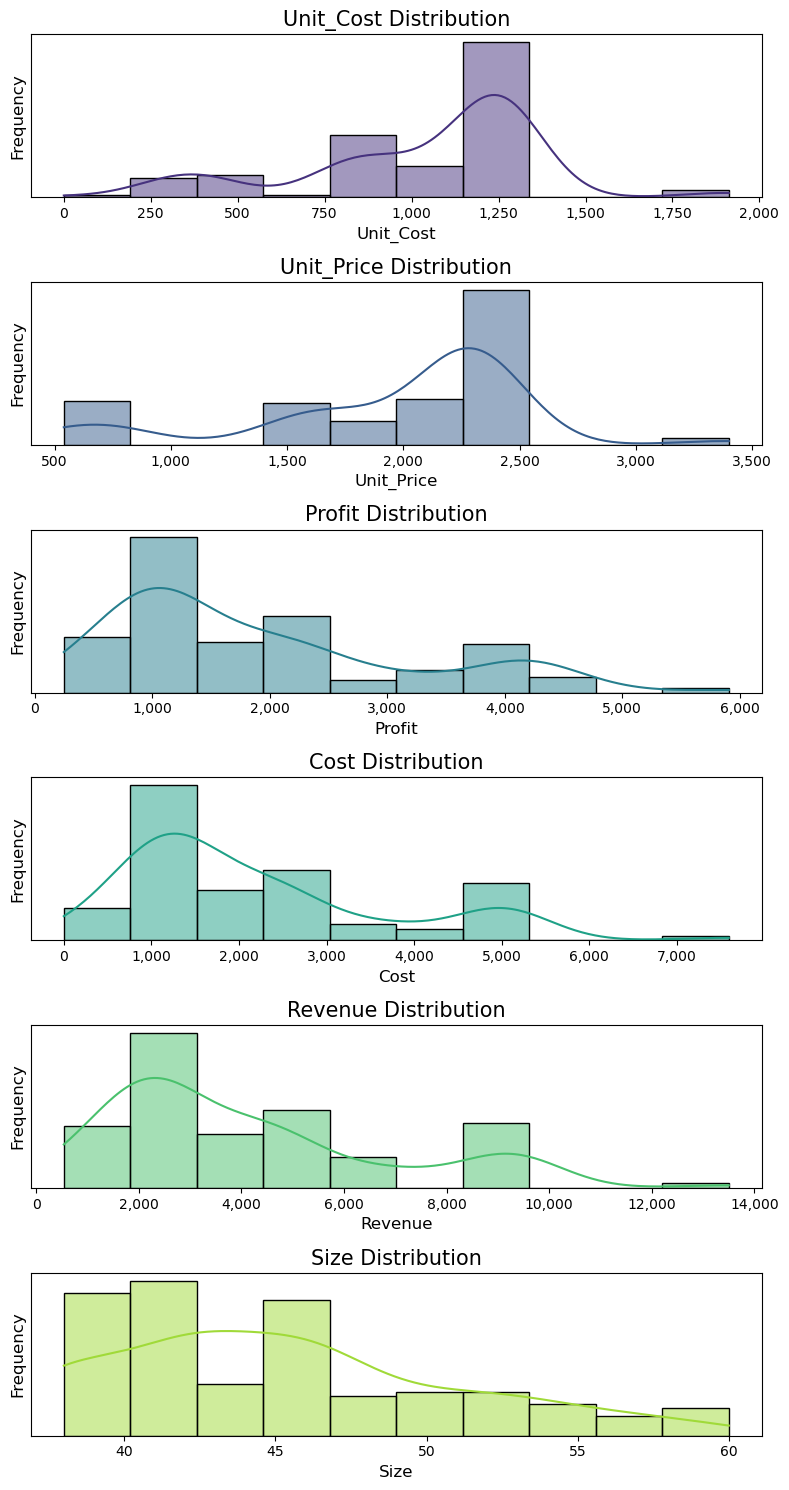

In [59]:
# Define plot configuration
figsize = (8, 15)
bins = 10
palette = sns.color_palette("viridis", 6)

# Create figure with five subplots
fig, ax = plt.subplots(6, 1, figsize=figsize)

# Define metrics
metrics = ["Unit_Cost", "Unit_Price", "Profit", "Cost", "Revenue", "Size"]

# Define a formatter to add commas for the x-axis labels
comma_format = ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')

# Plot histograms
for i, (metric, color) in enumerate(zip(metrics, palette)):
    sns.histplot(df[metric], bins=bins, color=color, ax=ax[i], kde=True)
    ax[i].set_title(f"{metric} Distribution", fontsize=15)
    ax[i].set_xlabel(metric, fontsize=12)
    ax[i].set_ylabel('Frequency', fontsize=12)
    
    # Remove scientific notation
    ax[i].ticklabel_format(style='plain', axis='x')
    
    # Apply comma format to x-axis
    ax[i].xaxis.set_major_formatter(comma_format)
    
    # Remove y-axis ticks
    ax[i].yaxis.set_ticks([])
    ax[i].set_yticklabels([])

    # Remove grid lines
    ax[i].grid(False)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


- Profit Distribution
  
The profit distribution exhibits a right-skewed shape, indicating that most profits are moderate to low, with a peak around 500-1000. 
The long tail to the right suggests occasional high-profit values exceeding 5,000.Key statistics of mean 1,200, median of 900, and 
standard deviation of 1,500.The moderate to low profit margins emphasize the need for efficient cost management.

- Cost Distribution
  
The cost distribution displays a right-skewed shape, indicating that most costs are moderate to low. 
The long tail to the right reveals occasional high-cost values.The high operational costs necessitate strategic cost optimization.

- Revenue Distribution
  
The revenue distribution shows a right-skewed shape, indicating most revenues are moderate to low, with a peak around 1,000-2,000. 
The long tail to the right suggests occasional high-revenue values exceeding 10,000. Key statistics comprise a mean of 2,500, median of 1,800,
and standard deviation of 2,000.Revenue potential is moderate to high, with opportunities for growth through targeted marketing and pricing strategies.

- Unit Price Distribution
  
The unit price distribution exhibits a left-skewed shape, indicating most unit prices are moderate to high. 
The short tail to the left reveals few low-unit-price values.The competitive pricing strategy appears effective, with room for adjustments.

- Unit Cost Distribution
  
The unit cost distribution exhibits a left-skewed shape, indicating most unit costs are moderate to high.
The short tail to the left reveals few low-unit-cost values. High unit costs underscore the importance of efficient production or procurement processes.

- Size Distribution
  
The size distribution exhibits a right-skewed shape, indicating most sizes are smaller with a few larger sizes.
The most common size appears to be around 42. Size Ranges from 40 to 60. The peak at 42 indicates that size 42 is the most popular among cutomers hence inventory levels should be based on size distribution to enhance inventory optimization.

**OUTLIERS DETECTION**

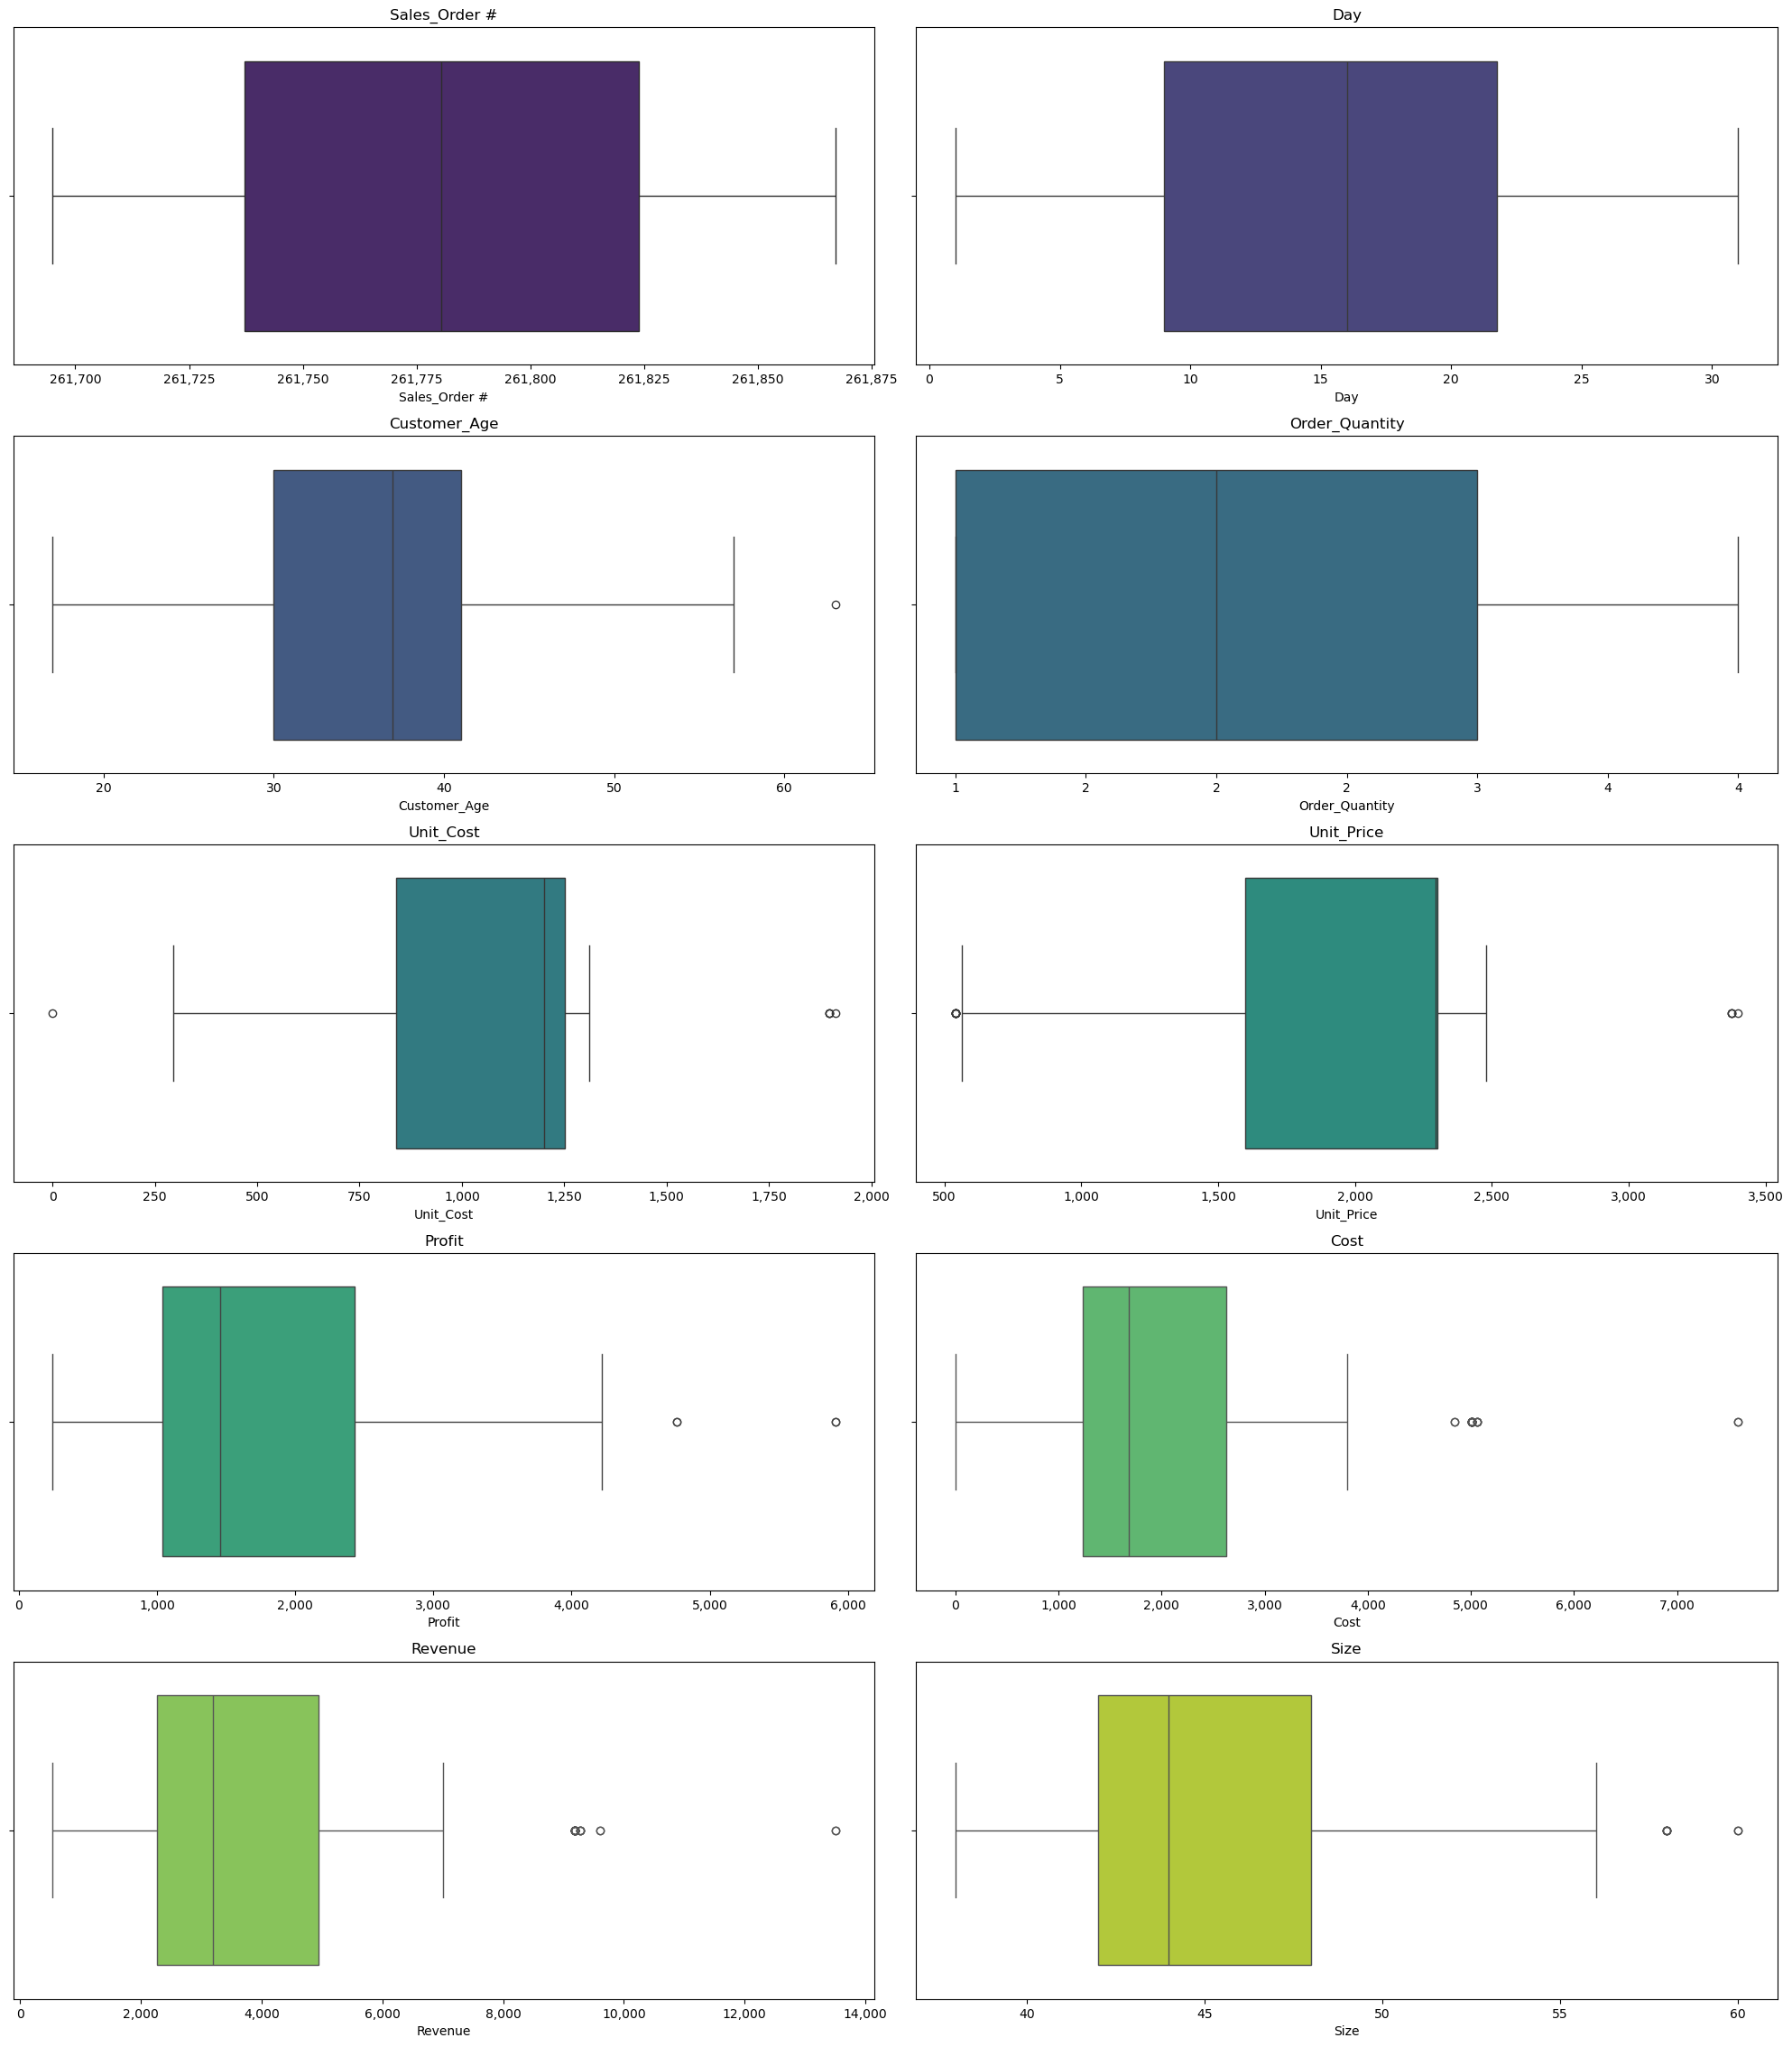

In [62]:
import matplotlib.ticker as ticker

# Get names of all numerical features
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = num_cols
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(20, 4.5*num_rows))
axes = axes.flatten()

# Define a color palette
palette = sns.color_palette("viridis", num_cols)

# Define a formatter to add commas for the x-axis labels
comma_format = ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')

# Create a boxplot for each numerical feature
for i, (var, color) in enumerate(zip(num_vars, palette)):
    sns.boxplot(x=df[var], ax=axes[i], color=color)
    axes[i].set_title(var)
    
    # Apply the comma format to the x-axis
    axes[i].xaxis.set_major_formatter(comma_format)
    
    # Remove grid lines
    axes[i].grid(False)

# Remove any extra empty subplots if needed
if num_cols < len(axes):
    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


The analysis revealed that some distributions have outliers, while others appear normally distributed.

Distributions without outliers include unit price, sales, day, and order quantity. These distributions are reasonable and consistent with expected patterns, indicating no unusual data points.

On the other hand, distributions with outliers include revenue, size, cost, profit, customer age, and unit cost. The presence of outliers in these distributions is likely due to legitimate business transactions, such as large orders or bulk purchases, variations in customer demographics, and fluctuations in production or material costs.

These outliers may represent legitimate business scenarios, such as wholesale orders, high-value transactions, or seasonal promotions. In contrast, 
the distributions without outliers likely represent typical business operations.

**SALES DISTRIBUTION**

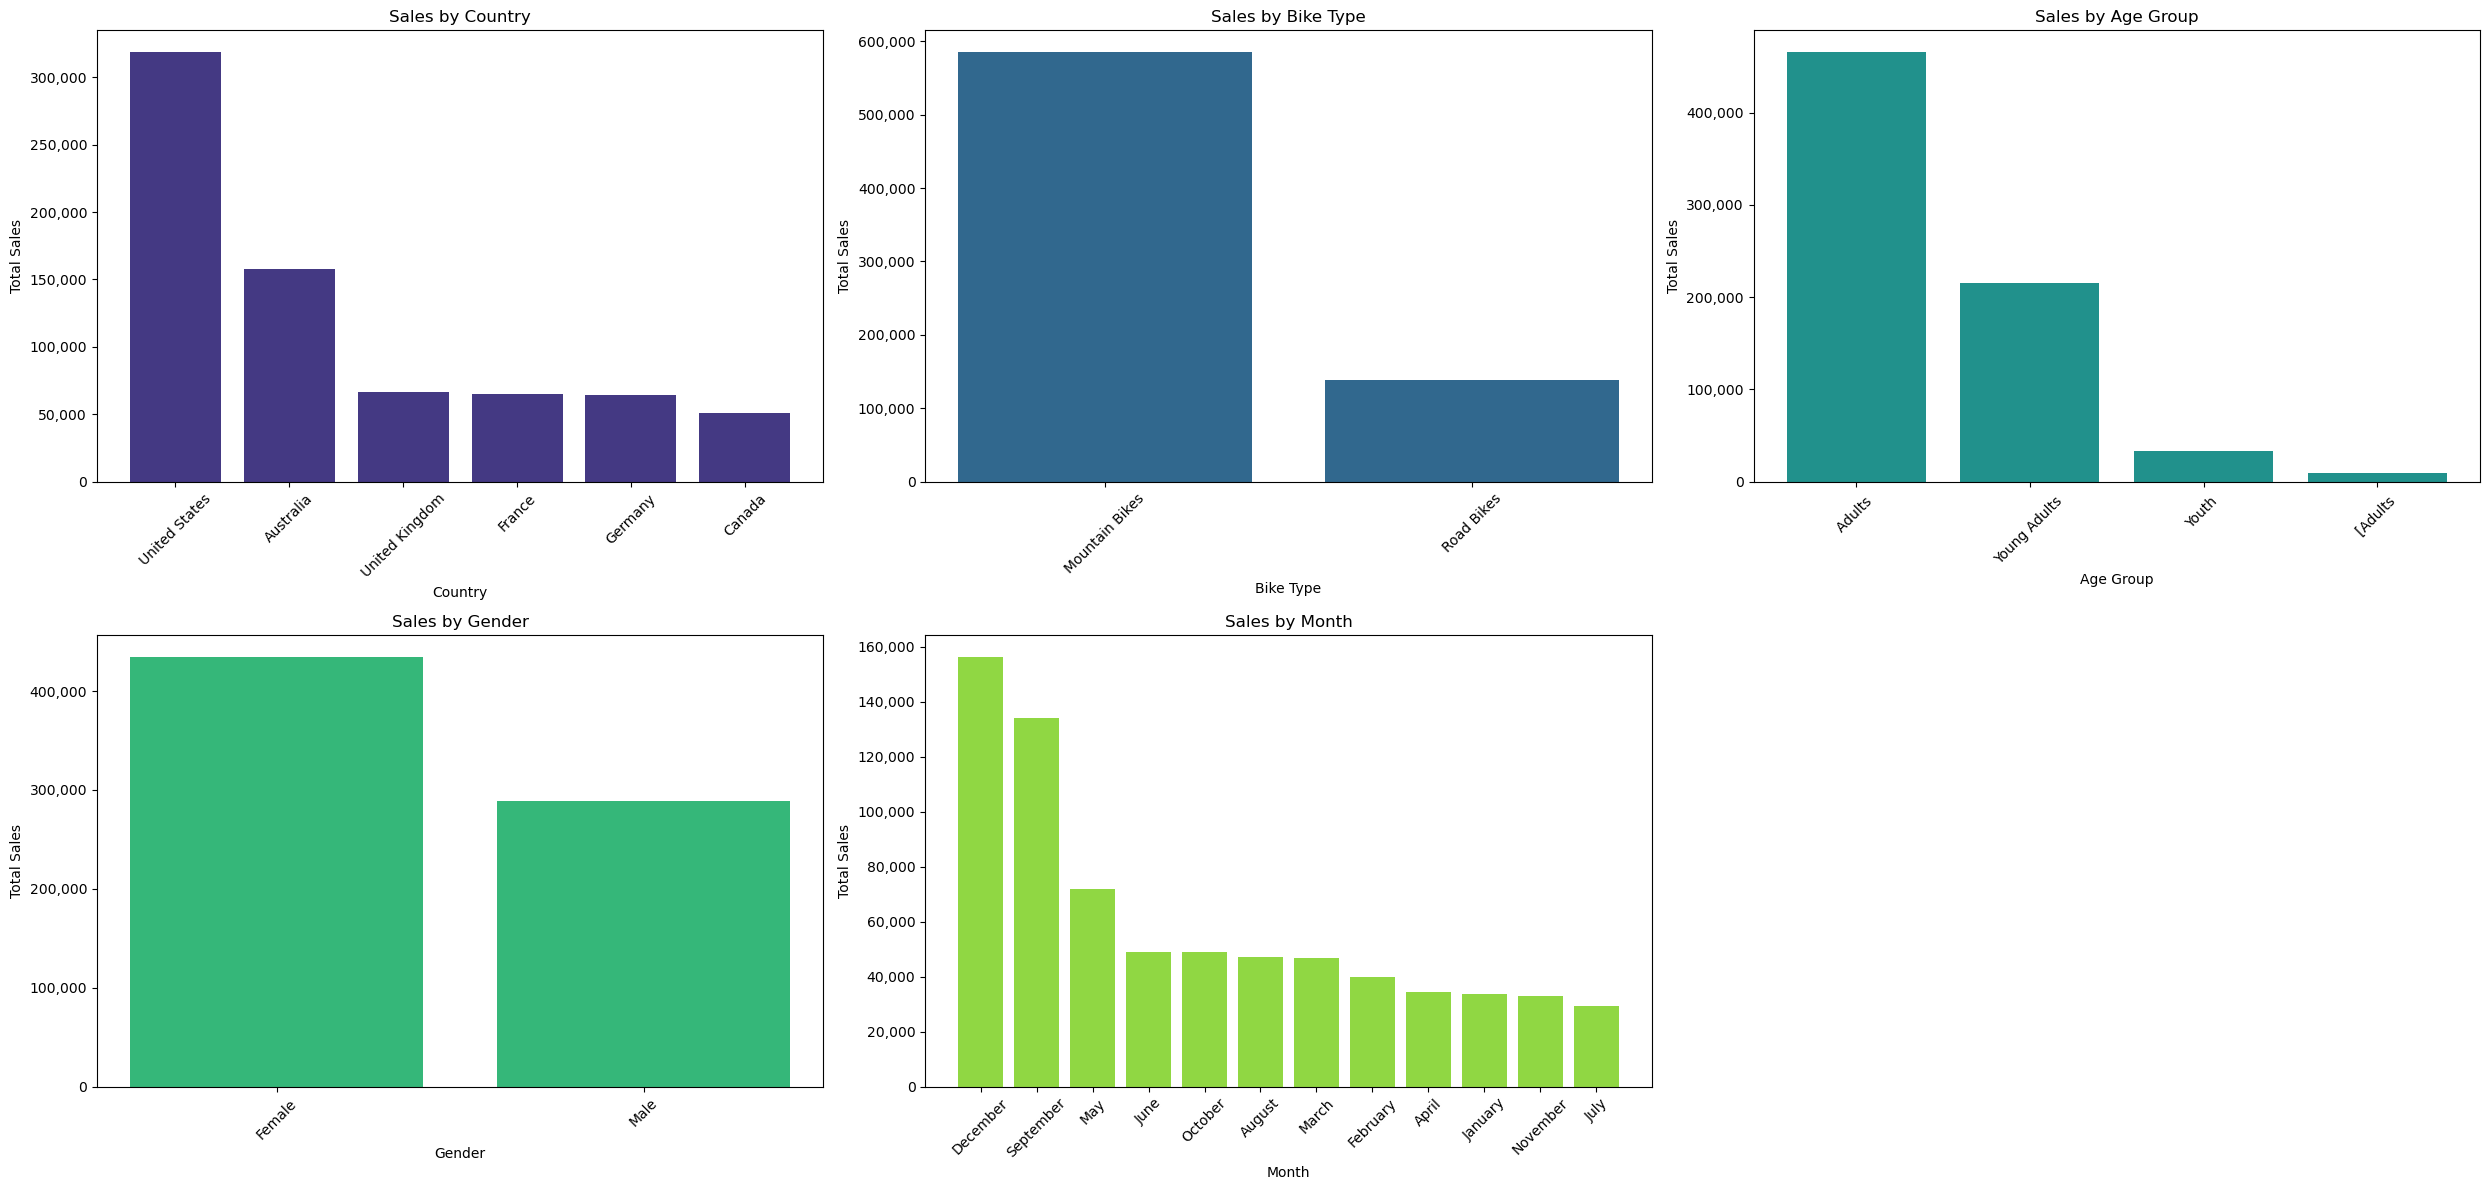

In [65]:
# Define plot configuration
fig, axs = plt.subplots(2, 3, figsize=(25, 12))

# Define a palette
colors = sns.color_palette("viridis", 5)

# Define a formatter to add commas for the y-axis labels
comma_format = ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')

# Sales by Country
region_sales = df.groupby('Country', observed=True)['Revenue'].sum().reset_index()
region_sales = region_sales.sort_values(by='Revenue', ascending=False)  # Sort by Revenue
axs[0, 0].bar(region_sales['Country'], region_sales['Revenue'], color=colors[0])
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Total Sales')
axs[0, 0].set_title('Sales by Country')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].yaxis.set_major_formatter(comma_format)  # Apply comma formatting to y-axis
axs[0, 0].grid(False)  # Remove grid lines

# Sales by Bike Type
bike_type_sales = df.groupby('Sub_Category', observed=True)['Revenue'].sum().reset_index()
bike_type_sales = bike_type_sales.sort_values(by='Revenue', ascending=False)  # Sort by Revenue
axs[0, 1].bar(bike_type_sales['Sub_Category'], bike_type_sales['Revenue'], color=colors[1])
axs[0, 1].set_xlabel('Bike Type')
axs[0, 1].set_ylabel('Total Sales')
axs[0, 1].set_title('Sales by Bike Type')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].yaxis.set_major_formatter(comma_format)  # Apply comma formatting to y-axis
axs[0, 1].grid(False)  # Remove grid lines

# Sales by Age Group
age_group_sales = df.groupby('Age_Grp', observed=True)['Revenue'].sum().reset_index()
age_group_sales = age_group_sales.sort_values(by='Revenue', ascending=False)  # Sort by Revenue
axs[0, 2].bar(age_group_sales['Age_Grp'], age_group_sales['Revenue'], color=colors[2])
axs[0, 2].set_xlabel('Age Group')
axs[0, 2].set_ylabel('Total Sales')
axs[0, 2].set_title('Sales by Age Group')
axs[0, 2].tick_params(axis='x', rotation=45)
axs[0, 2].yaxis.set_major_formatter(comma_format)  # Apply comma formatting to y-axis
axs[0, 2].grid(False)  # Remove grid lines

# Sales by Gender
gender_sales = df.groupby('Customer_Gender', observed=True)['Revenue'].sum().reset_index()
gender_sales['Customer_Gender'] = gender_sales['Customer_Gender'].cat.rename_categories({'M': 'Male', 'F': 'Female'})
gender_sales = gender_sales.sort_values(by='Revenue', ascending=False)  # Sort by Revenue
axs[1, 0].bar(gender_sales['Customer_Gender'], gender_sales['Revenue'], color=colors[3])
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Total Sales')
axs[1, 0].set_title('Sales by Gender')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].yaxis.set_major_formatter(comma_format)  # Apply comma formatting to y-axis
axs[1, 0].grid(False)  # Remove grid lines

# Sales by Month
month_sales = df.groupby('Month', observed=True)['Revenue'].sum().reset_index()
month_sales = month_sales.sort_values(by='Revenue', ascending=False)  # Sort by Revenue
axs[1, 1].bar(month_sales['Month'], month_sales['Revenue'], color=colors[4])
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Total Sales')
axs[1, 1].set_title('Sales by Month')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].yaxis.set_major_formatter(comma_format)  # Apply comma formatting to y-axis
axs[1, 1].grid(False)  # Remove grid lines


# Hide unused subplot
fig.delaxes(axs[1, 2])

# Layout so plots do not overlap
fig.tight_layout()

# Show plot
plt.show()


The five bar charts provide insights into sales performance across different dimensions.

**Sales by Region**
  
The chart enables identification of top-performing regions, contributing significantly to overall sales revenue. Notably, the United States experienced the highest spike in sales revenue, indicating its position as a leading market. Conversely, Canada recorded the lowest sales revenue, highlighting potential areas for improvement.


**Sales by Bike Type**

This chart shows the total sales revenue by bike category ( Mountain Bikes, Road Bikes).
Mountain Bikes experienced the highest spike in sales revenue, indicating their position as the most popular bike category.


**Sales by Age Group**

This chart illustrates the total sales revenue by customer age group (Adults, Youth).
Adults experienced the highest spike in sales revenue, significantly outperforming other age groups.


**Sales by Gender**

This chart presents the total sales revenue by customer gender. Females category was seen to dominate, thereby outperforming the males.

**Sales by Month**

This chart displays the total sales revenue by month where there was a huge spike observed in december and september.

**CORRELATION MAP BETWEEN NUMERICAL VALUES**

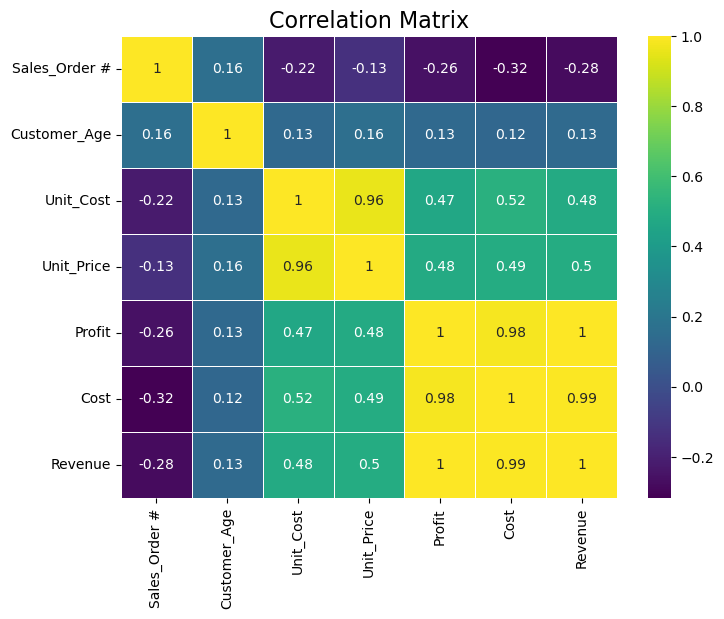

In [68]:
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Create a figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the 'coolwarm' palette
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

The correlation matrix you provided is a visual representation of how different variables in your dataset are related to each other. The color intensity and direction of the squares indicate the strength and direction of the correlation.
Key Observations:
 * Strong Positive Correlations:
   * Unit Cost and Unit Price: There's a very strong positive correlation between these two variables (0.96). This suggests that as the unit cost increases, the unit price also tends to increase.
   * Profit and Cost: A strong positive correlation (0.98) exists between profit and cost. This implies that higher costs often lead to higher profits, possibly due to higher sales prices or increased sales volume.
   * Cost and Revenue: A very strong positive correlation (0.99) indicates that higher costs are associated with higher revenue, likely due to increased sales or higher selling prices.
 * Weak or No Correlation:
   * Sales Order Number and Other Variables: The Sales Order Number appears to have very weak or no correlation with other variables, indicating that it's not a significant factor influencing the other variables.
Implications for Analysis:
 * Multicollinearity: The strong correlations between 'Unit Cost' and 'Unit Price', 'Profit' and 'Cost', and 'Cost' and 'Revenue' suggest potential multicollinearity issues. This can affect the accuracy and stability of statistical models. Consider addressing this by removing one of the highly correlated variables or using techniques like Principal Component Analysis (PCA).
 * Feature Importance: 'Unit Cost' and 'Unit Price' seem to be crucial for predicting 'Profit' and 'Revenue'. 'Customer Age' might also be a relevant factor to consider in further analysis.                      

#### **DATA ANALYSIS**

1. **SEASONALITY ANALYSIS**

Monthly Sales Trend

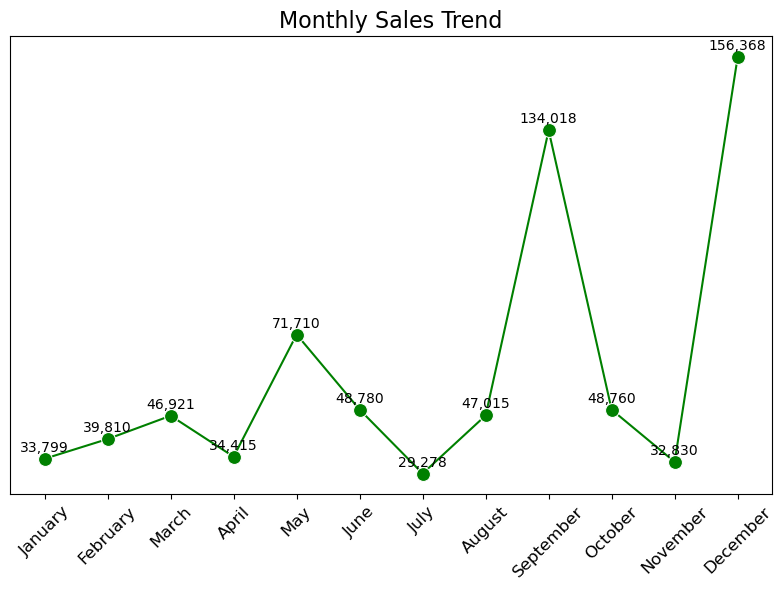

In [73]:
# Ensure 'Month' column is in the correct order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Group by 'Month' and calculate total sales
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()

# Sort by month order after grouping
monthly_sales = monthly_sales.sort_values(by='Month')

# Line chart
plt.figure(figsize=(8, 6))

# Customize lineplot
sns.lineplot(
    x='Month',
    y='Revenue',
    data=monthly_sales,
    marker="o",
    markersize=10,
    linestyle='-',
    color='green'  # Change line color to green
)

# Customize the plot
plt.title('Monthly Sales Trend', fontsize=16)

# Remove both x-axis and y-axis labels
plt.gca().set_xlabel('')  # No x-axis label
plt.gca().set_ylabel('')  # No y-axis label

# Remove the entire y-axis
plt.gca().get_yaxis().set_visible(False)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12)

# Add data labels
for x, y in zip(monthly_sales['Month'], monthly_sales['Revenue']):
    plt.annotate(f"{y:,.0f}", (x, y), textcoords="offset points", xytext=(0,5), ha='center')

# Remove grid lines
plt.grid(False)

# Adjust layout
plt.tight_layout()

plt.show()


The provided chart visualizes monthly sales data over the year, showing notable peaks in September and December, accounting for $134,018 and $156,368 of the total sales respectively. The increase in September may align with favorable post-summer weather, encouraging outdoor activities, while December's peak is likely driven by the holiday shopping season. 

Conversely, sales dip in July and November accounting for $29,278 and $32,830 of the total sales respectively. The decline in July could be due to extreme summer heat in some regions like the U.S. and parts of Europe, discouraging outdoor activities, while November might reflect a pre-holiday lull as consumers delay purchases in anticipation of December sales and promotions.


- For Peak Months (September, December):
Increase inventory of high-demand bike models to prevent stockouts.
Launch targeted marketing campaigns and promotions (e.g., "Holiday Deals" in December).

- For Off-Peak Months (e.g., February, April):
Introduce discounted pricing or promotional bundles.
Diversify product offerings to include winter-appropriate biking gear or accessories.

2. **ANALYZING PRODUCT PERFORMANCE**

Revenue by Sub Category

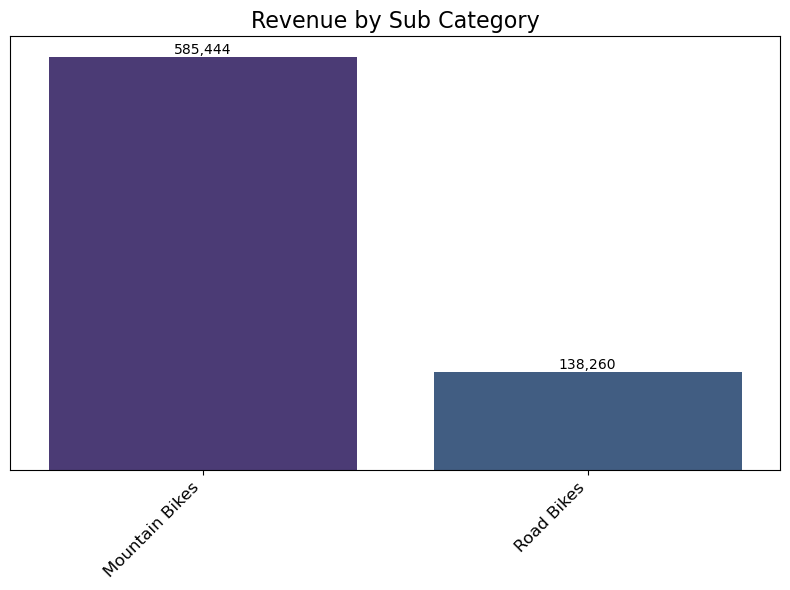

In [77]:
# Define a palette for consistent styling
palette = sns.color_palette("viridis", as_cmap=False)

# Group by Sub_Category and calculate total Revenue
subcategory_revenue = df.groupby('Sub_Category', observed=True)['Revenue'].sum().reset_index()

# Sort by Revenue descending
subcategory_revenue = subcategory_revenue.sort_values(by='Revenue', ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=subcategory_revenue,
    x='Sub_Category',
    y='Revenue',
    palette=palette[: len(subcategory_revenue)]  # Use a palette matching the number of categories
)

# Add data labels on top of the bars
for index, row in subcategory_revenue.iterrows():
    ax.text(
        x=index,
        y=row['Revenue'],
        s=f'{row["Revenue"]:,.0f}',  # Format the number with commas
        ha='center',  # Align horizontally to the center of the bar
        va='bottom',  # Place the text above the bar
        fontsize=10
    )

# Set plot labels and title
#plt.xlabel("Sub Category", fontsize=14)
plt.title("Revenue by Sub Category", fontsize=16)

# Remove x-axis label
ax.set_xlabel("")


# Remove y-axis labels and ticks
ax.set_ylabel("")
ax.set_yticks([])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


The bar chart shows the revenue generated by two subcategories of bikes: Mountain Bikes and Road Bikes.

- Mountain bikes generated significantly more revenue than road bikes. The revenue for mountain bikes is $585,444, while the revenue for road bikes is $138,260.
  
This information suggests that mountain bikes are a more popular or profitable product category for this business compared to road bikes.

Revenue by Model Type

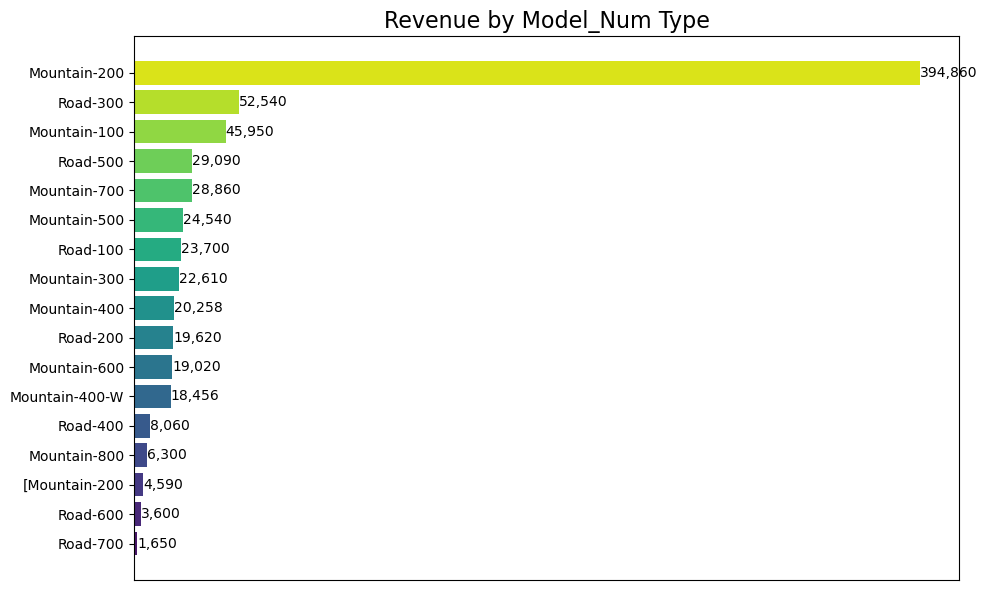

In [80]:
# Group data by Model_num, calculate sum of revenue, and sort by Revenue in ascending order
category_sales = df.groupby('Model_num')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=True)

# Set up the figure
plt.figure(figsize=(10, 6))

# Use the 'viridis' palette for colors
colors = sns.color_palette("viridis", len(category_sales))

# Horizontal bar chart with shades of colors
plt.barh(category_sales['Model_num'], category_sales['Revenue'], color=colors)

# Customize the plot
plt.title('Revenue by Model_Num Type', fontsize=16)
plt.gca().set_xlabel('')  # Remove x-axis label
plt.gca().set_xticks([])  # Hide x-axis ticks

# Add data labels next to each bar
for index, value in enumerate(category_sales['Revenue']):
    plt.text(value, index, f"{value:,.0f}", va='center')  # Display data label

# Adjust layout
plt.tight_layout()

plt.show()

The Mountain-200 model generated the highest revenue among all model types, reaching ($394,860.00), whereas the Road-700 model produced the least revenue at just ($1,650.00). 
This disparity highlights a significant gap in revenue generation between the two models, suggesting that the Mountain-200 has stronger market appeal or possibly a higher price point that drives more sales compared to the Road 700. 
- This insight might indicate a need to analyze factors behind the Road-700’s lower performance, such as market demand, pricing strategy, or promotional efforts, to identify areas for potential revenue growth.

Profit Margin Analysis by Bike Model Type

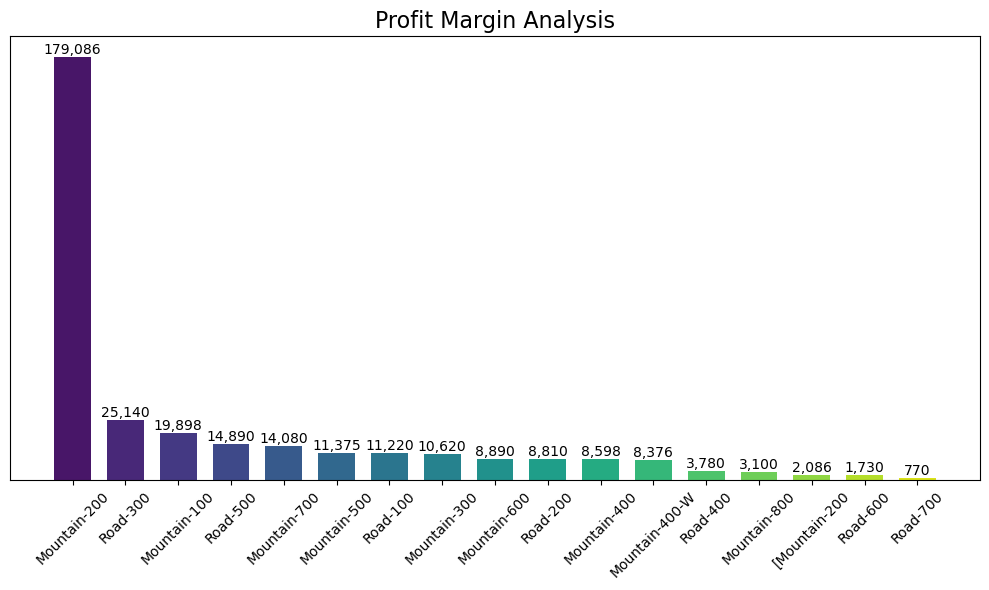

In [83]:
# Group data by product category, calculate sum of profit
profit_margin = df.groupby('Model_num')['Profit'].sum().reset_index()

# Sort by profit values in descending order
profit_margin = profit_margin.sort_values(by='Profit', ascending=False)

# Set up the figure
plt.figure(figsize=(10, 6))

# Use the 'viridis' palette for colors
colors = sns.color_palette("viridis", len(category_sales))


# Plot bar chart with the custom color palette
bars = plt.bar(profit_margin['Model_num'], profit_margin['Profit'], color=colors, width=0.7)

# Add data labels on bars with commas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

# Customize plot
#plt.xlabel('Model Number', fontsize=14)
plt.title('Profit Margin Analysis', fontsize=16)
plt.xticks(rotation=45)
plt.yticks([])  # Remove y-axis ticks

# Adjust layout
plt.tight_layout()

plt.show()

This bar chart shows the profit margin for each bike model category, highlighting the profit each one generates after covering costs.
##### Key Insights:
- Top Performer: Mountain-200 stands out for its high profitability and lower costs, generating $179,086 in profit.
- Second Best Performer: Road-300 follows with a profit of $25,140. With proper monitoring and management, it has the potential to perform as well as the top model.
- Needs Attention: Road-700 has the lowest profit margin, bringing in only $770. Targeted initiatives such as marketing campaigns or design adjustments should be prioritized to improve performance and enhance overall revenue.

Popular Bike Size

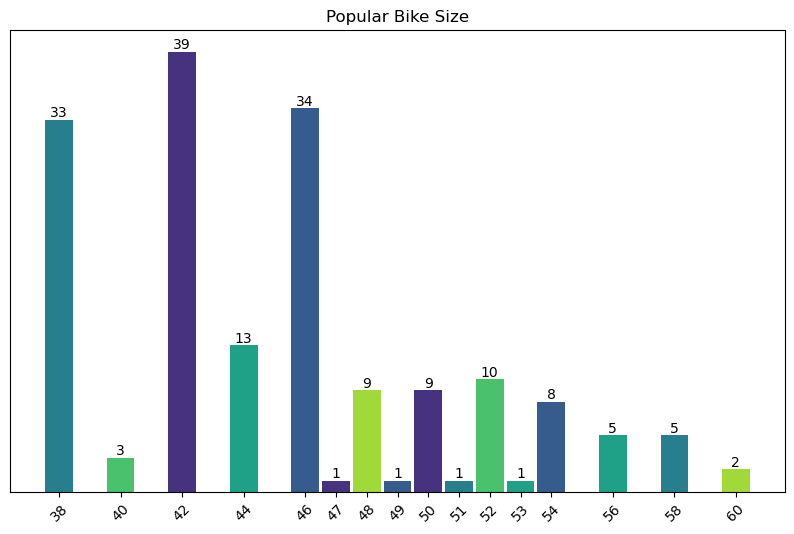

In [86]:
size_counts= df['Size'].value_counts()

sorted_sizes = size_counts.sort_values(ascending =False)

# Use the "viridis" palette for a vibrant look
colors = sns.color_palette("viridis")


sizes= list(sorted_sizes.keys())

plt.figure(figsize=(10,6))
plt.bar(sorted_sizes.index, sorted_sizes.values, color= colors, width =0.9
       )

for size, count in  sorted_sizes.items():
    plt.text(size,count, str(count), ha='center', va='bottom')

plt.xticks(sizes)
    

#plt.ylabel('Count')
plt.title('Popular Bike Size')
plt.xticks(rotation=45)
plt.yticks([])
plt.show()

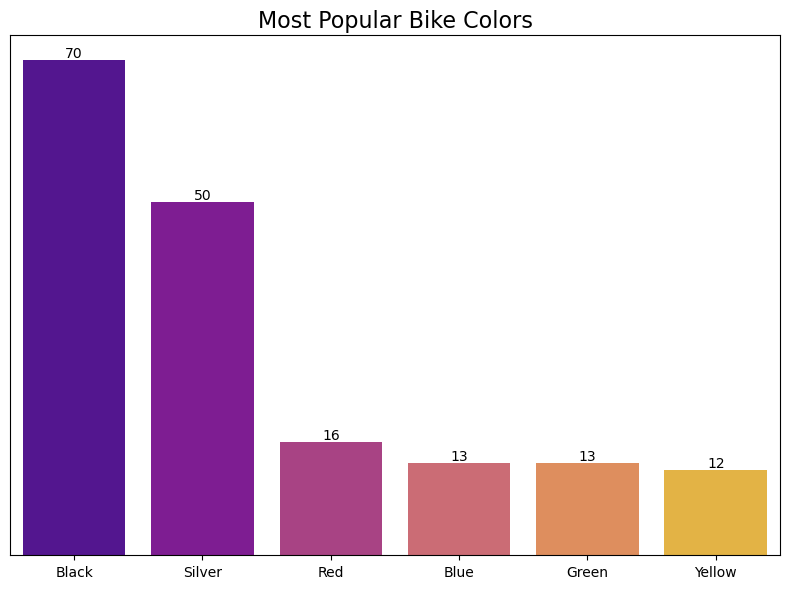

In [87]:
# Group by Color and count occurrences to find the most popular colors
popular_colors = df.groupby('Color', observed=True).size().reset_index(name='Count')
popular_colors = popular_colors.sort_values(by='Count', ascending=False)

# Create a single plot for popular colors
fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted size for a single plot

# Plot popular colors
sns.barplot(
    data=popular_colors,
    x='Color',
    y='Count',
    palette='plasma',
    ax=ax
)
ax.set_title('Most Popular Bike Colors', fontsize=16)

# Remove x-axis labels
ax.set_xlabel("")

ax.set_ylabel('')  # Remove y-axis label
ax.set_yticks([])  # Remove y-axis calibration

# Add data labels for the bars
for i, row in enumerate(popular_colors.itertuples()):
    ax.text(i, row.Count, f'{row.Count}', ha='center', va='bottom', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The bar chart depicts the count of orders by bike sizes and bike colors. It is evident that the most popular bike sizes are 42,46 and 38 with an order count quantity of 39, 34, and 33 respectively. 
Additionally, black and silver are the most popular bike colors with an order quantity of 70 and 50 respectively.

3. **REGIONAL PERFORMANCE**

Map to display revenue across countries

In [91]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


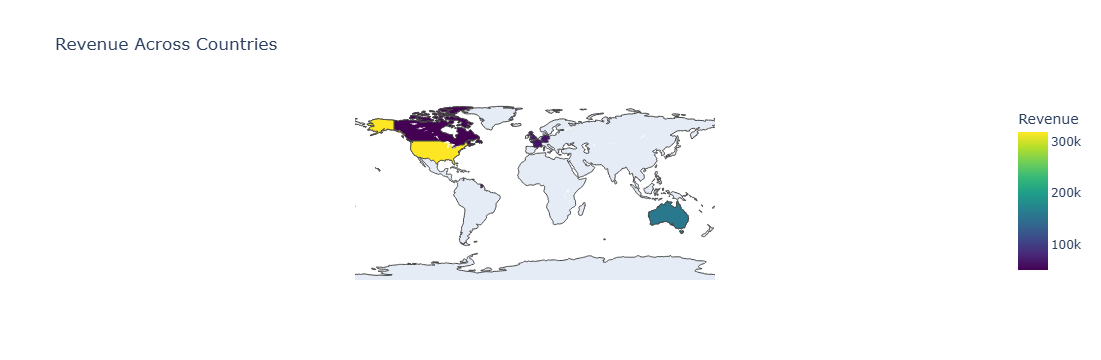

In [92]:
import plotly.express as px

# Group by Country and calculate total Revenue
country_revenue = df.groupby('Country', observed=True)['Revenue'].sum().reset_index()

# Create a choropleth map using Plotly
fig = px.choropleth(
    country_revenue,
    locations="Country",  # Column containing country names
    locationmode="country names",  # Match locations to country names
    color="Revenue",  # Revenue data to visualize
    hover_name="Country",  # Show country name on hover
    color_continuous_scale="Viridis",  # Choose a color scale
    title="Revenue Across Countries"
)

# Adjust layout for better appearance
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    coloraxis_colorbar=dict(title="Revenue")
)

# Show the map
fig.show()

Average Order Quantity Volume Across Countries

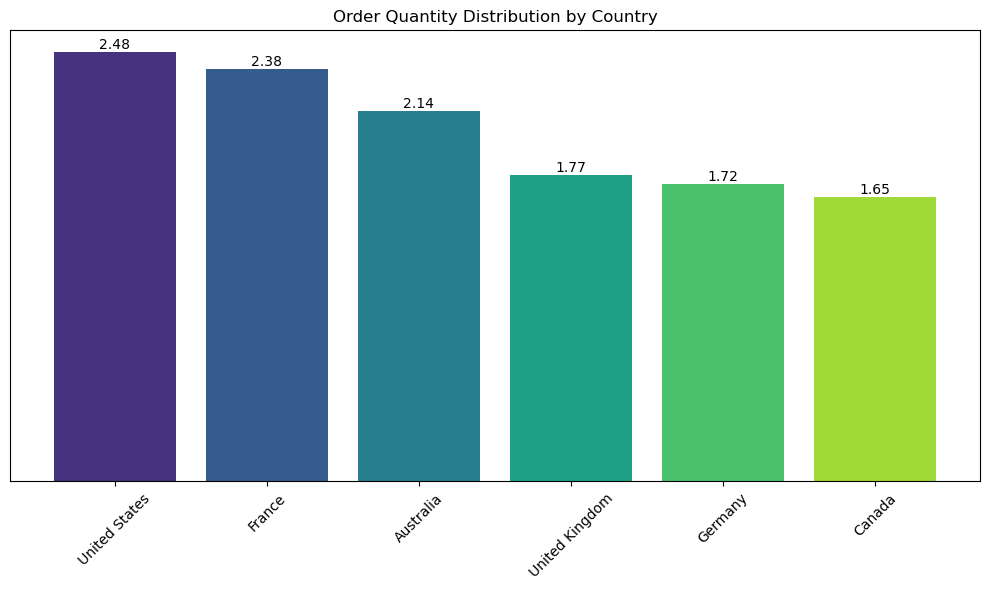

In [94]:
# Group data by Country and calculate the mean Order Quantity, then sort by Order Quantity in descending order
order_quantity_by_country = df.groupby('Country')['Order_Quantity'].mean().reset_index().sort_values(by='Order_Quantity', ascending=False)

# Set up the figure
plt.figure(figsize=(10, 6))

# Use the "viridis" palette for a vibrant look
colors = sns.color_palette("viridis", len(order_quantity_by_country))

# Create a bar chart
bars = plt.bar(order_quantity_by_country['Country'], order_quantity_by_country['Order_Quantity'], color=colors)

# Add data labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Customize the plot
plt.title('Order Quantity Distribution by Country')

# Remove x-axis labels
ax.set_xlabel("")

plt.gca().set_ylabel('')  # Remove y-axis label
plt.gca().set_yticks([])  # Remove y-axis ticks
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()


plt.savefig('country1.png')
# Show plot
plt.show()

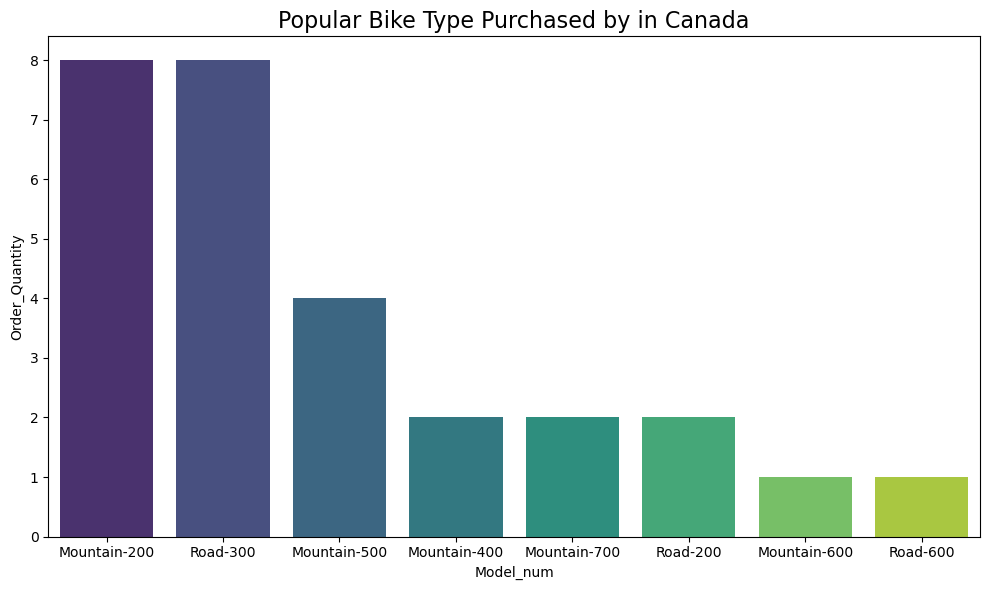

In [95]:
# Filter the data for Canada
canada_data = df[df['Country'] == 'Canada']

# Group by the bike type (assuming bike type is identified by 'Sub_Category') and calculate total quantity
bike_quantities_canada = canada_data.groupby('Model_num', observed=True)['Order_Quantity'].sum().reset_index()

# Sort the result for better readability
bike_quantities_canada = bike_quantities_canada.sort_values(by='Order_Quantity', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bike_quantities_canada,
    x='Model_num',
    y='Order_Quantity',
    palette='viridis'
)

# Customize the chart
plt.title('Popular Bike Type Purchased by in Canada', fontsize=16)

# Remove x-axis labels
ax.set_xlabel("")


# Remove y-axis labels and ticks
ax.set_ylabel("")
ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()

The bar chart displays the distribution of order quantity volume purchased across the six countries.

Insights
- United States has the highest average order quantity, 2.48 and accounted for $318.814K of the total revenue generated, significantly outperforming the other countries.

- Canada has the lowest average order quantity of 1.65 and acoounted for $50.63K of the total revenue generatedcompared to other countries. Also, it is evident that canada's most preferred bikes types were mountain-200, road-300 and mountain-500.

4. **CUSTOMER  DEMOGRAPHICS AND PREFERENCES**

Sales Distribution by Gender

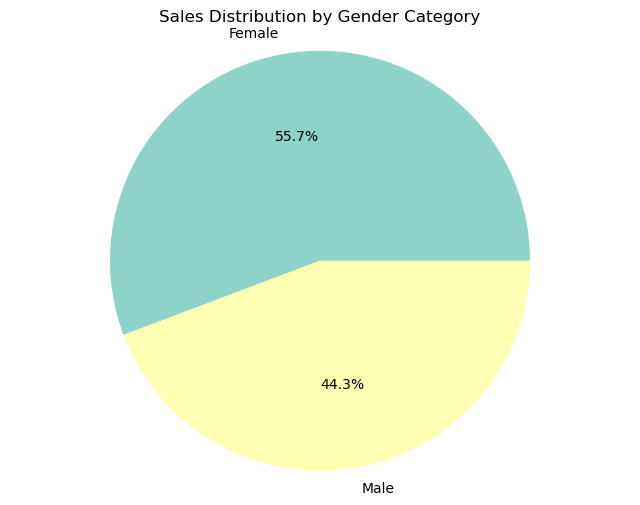

In [99]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Count occurrences of each gender in 'Customer_Gender'
customer_gender_counts = df['Customer_Gender'].value_counts()

# Map 'F' to 'Female' and 'M' to 'Male'
labels = customer_gender_counts.index.map({'F': 'Female', 'M': 'Male'})

# Use 'Set3' palette for more vibrant colors
colors = sns.color_palette("Set3", n_colors=2)

# Create pie chart with new colors
plt.pie(customer_gender_counts.values, labels=labels, colors=colors, autopct='%1.1f%%')

# Set title
plt.title('Sales Distribution by Gender Category')

# Ensure pie chart is a circle
plt.axis('equal')

# Display pie chart
plt.show()

The pie chart is a representative of proportion of Customers by Gender that purchased the bike.
Female customers accounted for 55.7% whiles the Males customers accounted for 44.3% of the total customers.
This indicates that the customers are predominantly females.

Size Preferences By Gender

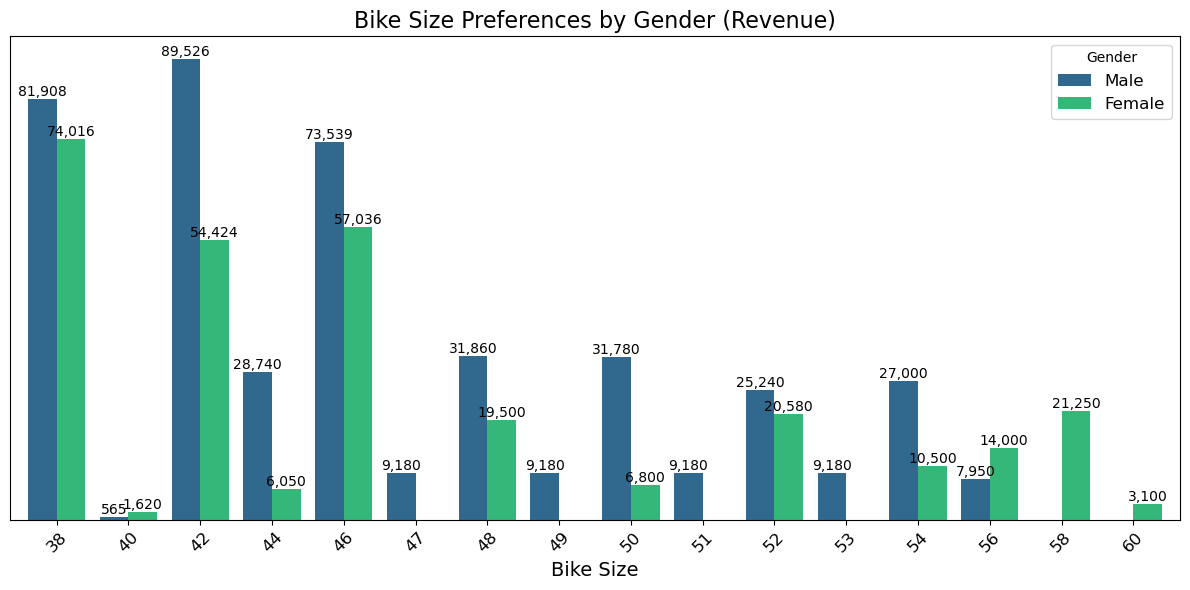

In [102]:
# Group by Gender and Size to calculate total Revenue
size_gender_preferences: pd.DataFrame = df.groupby(['Customer_Gender', 'Size'], observed=True)['Revenue'].sum().reset_index()

# Create a pivot table to format the data for grouped bar plotting
size_gender_pivot: pd.DataFrame = size_gender_preferences.pivot(index='Size', columns='Customer_Gender', values='Revenue').fillna(0)

# Generate a color palette with two shades from Viridis
viridis_palette = sns.color_palette("viridis", n_colors=2)

# Plot the data as a grouped bar chart
ax = size_gender_pivot.plot(
    kind='bar',
    figsize=(12, 6),
    color=viridis_palette,  # Apply Viridis color palette
    width=0.8  # Adjust bar width
)

# Add chart titles and labels
plt.title('Bike Size Preferences by Gender (Revenue)', fontsize=16)
plt.xlabel('Bike Size', fontsize=14)
plt.ylabel('')  # Remove y-axis label
ax.set_yticks([])  # Remove y-axis calibration
plt.xticks(rotation=45, fontsize=12)

# Add a legend
plt.legend(title='Gender', labels=['Male', 'Female'], fontsize=12)

# Add data labels to the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only display labels for non-zero values
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
                height,  # Position the text above the bar
                f'{height:,.0f}',  # Format the number
                ha='center', va='bottom', fontsize=10
            )

# Tight layout for better appearance
plt.tight_layout()

# Show plot
plt.show()


The bar chart depicts the distribution of bike sizes and the corresponding revenue generated by each size, segregated by gender.
- The chart shows a clear preference for 42,38 and 46 bike sizes. 
- Males seems to prefer larger bike sizes whereas females appear to prefer a more wider range of bike sizes.

Customer Age Vrs Average Order Quantity

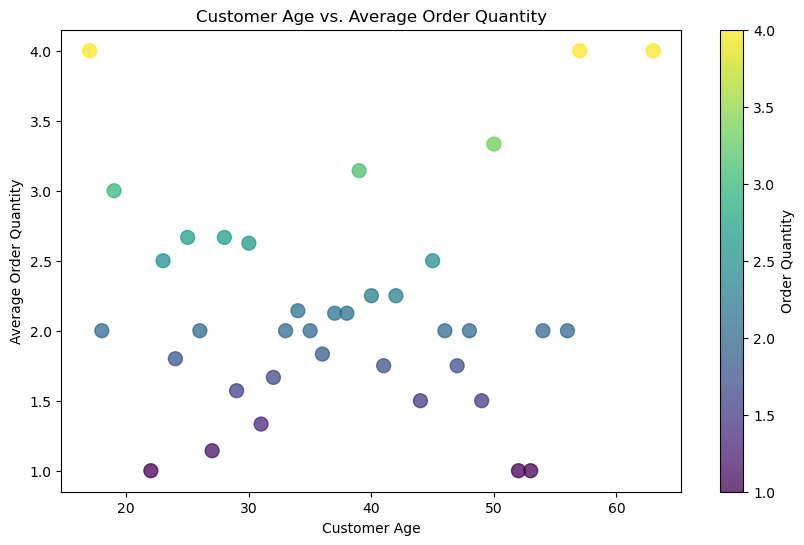

In [105]:
# Group by 'Customer_Age' and calculate average 'Order_Quantity'
grouped_data = df.groupby('Customer_Age')['Order_Quantity'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Customer_Age'], grouped_data['Order_Quantity'], 
             c=grouped_data['Order_Quantity'], cmap='viridis', s=100, alpha=0.75)
plt.xlabel('Customer Age')
plt.ylabel('Average Order Quantity')
plt.title('Customer Age vs. Average Order Quantity')

# Add a color bar for the viridis palette
plt.colorbar(label='Order Quantity')

plt.show()


This scatter plot visualizes the relationship between customer age and average order quantity. It shows a distribution of data points, representing the average order quantity for different customer age groups. 
However, without further analysis, it is difficult to draw definitive conclusions about the relationship between age and order quantity.
- No Strong Correlation: the plot doesn't indicate a strong linear relationship between age and order quantity but there is significant variability in order quantities within each age group.

#### **RECOMMENDATIONS**

- Utilize seasonal promotions and discounts to boost sales during off-peak periods(July and November).

- Implement targetted marketting campaigns based on customer demographics and preferences. From the insights generated, marketing campaigns developed should focus on female customers, as they tend to place larger orders.

- Focus on high-performing models types and sizes like the Mountain-200 and size 42 respectively and consider investigating the cause of low performing bikes like road-700 model types.

- Provide a range of products to appeal to different age groups. To targeting male customers, focus on offering larger bike sizes (42, 46) that align with their demonstrated preference and pProvide a broader selection of bike sizes to accommodater diverse preferences, ensuring inclusivity across all age groups and riding need to target female customers.

- Leverage the strong performance in the United States by optimizing marketing strategies, increasing inventory levels, and offering tailored promotions to further boost sales and maintain its dominant position. to increase revenue generated by canada, gather feedback from customers to understand why mountain-200, road-300 and mountain-500 bikes are preferred and identify potential improvements or complementary offerings..

#### **HYPOTHESIS TESTING: COUNTRY IMPACT ON UNIT PRICE**

- **Test Objective**
  
To determine if there is a significant impact of countries on Unit_Price.

- **Test Methodology**
  
Analysis of Variance (ANOVA) test was performed using the f_oneway function from the scipy.stats library.


In [111]:
# Check if country has significant impact on unit price

# NULL HYPOTHESIS (H0): Country have a significant impact on unit_price.
# ALTERNATIVE HYPOTHESIS (H1): Country DOES NOT have a significant impact on unit_price.

countries = df['Country'].unique()
unit_price = [df[df['Country'] == country]['Unit_Price'] for country in countries]

# Perform ANOVA test
f_stat, p_val = f_oneway(*unit_price)

print("ANOVA Test Results:")
print("F-statistic:", f_stat)
print("p-value:", p_val)

# Interpret results
alpha = 0.05  # Significance level
if p_val < alpha:
    print("Reject null hypothesis: Country DOES NOT have a significant impact on unit_price")
else:
    print("Fail to reject null hypothesis:Country have a significant impact on unit_price")

ANOVA Test Results:
F-statistic: 2.05534450981272
p-value: 0.07347044930934377
Fail to reject null hypothesis:Country have a significant impact on unit_price


- **Test Results**

F-statistic: 2.05534450981272, 
p-value: 0.07347044930934377

- **Conclusion**
  
The null hypothesis, stating that there is significant impact of countries on unit_price, was failed to be rejected (p-value > 0.05). 
This indicates that country has a statistically significant impact on Unit_Price.

- **Interpretation**
The significant impact of countries on Unit_Price suggests that geographical location plays a role in determining Unit_Price. 

### **MACHINE LEARNING**

In [114]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [115]:
df.head()

Sales_Order #  Day     Month  Customer_Age Customer_Gender        Country  \
0         261695    1  December            39               F  United States   
1         261696    2   January            39               F  United States   
2         261697    3  February            39               F  United States   
3         261698    4     March            39               F  United States   
4         261699    5     April            39               F  United States   

        State    Sub_Category  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
0  California  Mountain Bikes               4     1252.0      2295.0  4172.0   
1  California  Mountain Bikes               4     1252.0      2295.0  4172.0   
2  California  Mountain Bikes               4     1252.0      2295.0  4172.0   
3  California  Mountain Bikes               4     1252.0      2295.0  4172.0   
4  California  Mountain Bikes               4     1252.0      2295.0  4172.0   

     Cost  Revenue  Age_Grp Age_Range     Model_num  Color  Size  
0  5008.0   9180.0  Adults      35-64  Mountain-200  Black    46  
1  5008.0   9180.0  Adults      35-64  Mountain-200  Black    47  
2  5008.0   9180.0  Adults      35-64  Mountain-200  Black    48  
3  5008.0   9180.0  Adults      35-64  Mountain-200  Black    49  
4  5008.0   9180.0  Adults      35-64  Mountain-200  Black    50

In [116]:
# Select columns of interest
columns_of_interest = ['Month','Country','Sub_Category','Unit_Price','Model_num','Color','Size','Cost']
df_selected = df[columns_of_interest]

# Ensure 'Price' is numerical
df_selected.loc[:, 'Unit_Price'] = pd.to_numeric(df_selected['Unit_Price'])


# Define categorical and numerical columns
categorical_cols = ['Month','Country','Sub_Category', 'Model_num', 'Color', ]
numerical_cols = ['Size','Cost']

# Preprocess categorical columns
le = LabelEncoder()
for col in categorical_cols:
   df_selected.loc[:, col] = le.fit_transform(df_selected[col])


# Scale numerical columns
scaler = StandardScaler()
df_selected.loc[:, numerical_cols] = scaler.fit_transform(df_selected[numerical_cols])


# Define X (features) and y (target)
X = df_selected.drop('Unit_Price', axis=1)  # Features: Model Number, Size, Color, Month
y = df_selected['Unit_Price']  # Target: Price

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (174, 7)
y shape: (174,)


In [117]:
#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Testing Various Models

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Data preprocessing (from your provided code)
columns_of_interest = ['Month', 'Country', 'Sub_Category', 'Unit_Price', 'Model_num', 'Color', 'Size', 'Cost']
df_selected = df[columns_of_interest]

# Ensure 'Unit_Price' is numerical
df_selected.loc[:, 'Unit_Price'] = pd.to_numeric(df_selected['Unit_Price'])

# Define categorical and numerical columns
categorical_cols = ['Month', 'Country','Sub_Category', 'Model_num', 'Color']
numerical_cols = ['Size', 'Cost']

# Preprocess categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df_selected.loc[:, col] = le.fit_transform(df_selected[col])

# Scale numerical columns
scaler = StandardScaler()
df_selected.loc[:, numerical_cols] = scaler.fit_transform(df_selected[numerical_cols])

# Define X (features) and y (target)
X = df_selected.drop('Unit_Price', axis=1)  # Features
y = df_selected['Unit_Price']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define models
models = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "R2": r2}
    
    print(f"{model_name} - Mean Squared Error: {mse:.4f}, R-squared: {r2:.4f}\n")

# Compare results
results_df = pd.DataFrame(results).T
print("Model Comparison:\n", results_df)


Training Random Forest Regressor...
Random Forest Regressor - Mean Squared Error: 30845.5417, R-squared: 0.8811

Training Gradient Boosting Regressor...
Gradient Boosting Regressor - Mean Squared Error: 44128.7066, R-squared: 0.8299

Model Comparison:
                                       MSE        R2
Random Forest Regressor      30845.541683  0.881105
Gradient Boosting Regressor  44128.706561  0.829904


In [120]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display feature importance (optional)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

Mean Squared Error: 30845.541682857147
R-squared: 0.8811045361617073
Feature Importance:
         Feature  Importance
3     Model_num    0.470293
6          Cost    0.355207
0         Month    0.055408
2  Sub_Category    0.052935
4         Color    0.032527
5          Size    0.028819
1       Country    0.004811


The Random Forest Regressor achieved an R-squared score of 88%, indicating that the model explains a significant proportion of the variance in the target variable. This performance suggests the model is well-suited for predicting outcomes based on the given features. However, there is still room for improvement in capturing the remaining 12% of variance.

#### **Conclusion**

The **Bike Sales Analysis** project has provided valuable insights into the key drivers of sales performance across various factors, such as bike models, sizes, colors, and geographical locations. By analyzing customer preferences, regional trends, and sales patterns, we were able to identify areas for growth and optimization. Some of the key findings include:
- **Top-performing bike models** (Mountain-200) and regional sales preferences.
- **Customer segmentation** by gender and bike size preference, revealing opportunities for tailored marketing and product offerings.
- **Geographical variations** in order quantity and revenue, with particular emphasis on regions like the United States performing significantly better than others.

Based on these insights, the **Unit Price Predictor** was developed to forecast the prices of bikes, which could serve as a valuable tool for inventory planning, pricing strategies, and demand forecasting. The model achieved an **88% R-squared score**, indicating strong performance, although there is still room for improvement in capturing additional variance. 

#### **Recommendations for Future Work**

**Model Refinement**:  
   - **Feature Engineering**: Investigating additional features such as bike usage patterns or more advanced feature selection techniques could improve model performance.

**Data Collection & Expansion**:  
   - Collecting more granular data on customer feedback, or competitor pricing would provide deeper insights into pricing dynamics.
   
**Deployment & Monitoring**:  
   - Deploying the model into a production environment to assist with dynamic pricing and inventory management is the next step.
   - Continuous monitoring and periodic retraining of the model with updated data will ensure its performance remains optimal over time.